### EDA

In [1]:
import pandas as pd

In [2]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [3]:
final_combined_data_cleaned.describe()

year            pH            EC    Phosphorus     Potassium  \
count  20998.000000  20998.000000  20998.000000  20998.000000  20998.000000   
mean    2018.999810      5.635805      0.098332     15.964957    105.829481   
std        2.581915      1.056754      0.107890     17.189961     75.371909   
min     2015.000000      3.000000      0.001000      0.000000      0.100000   
25%     2017.000000      4.800000      0.040000      6.300000     53.000000   
50%     2019.000000      5.400000      0.070000     11.300000     84.500000   
75%     2021.000000      6.500000      0.120000     18.200000    137.000000   
max     2023.000000      9.900000      1.635000    151.950000    534.000000   

                 OM         Urea1         Urea2         Urea3         Urea4  \
count  20998.000000  20998.000000  20998.000000  20998.000000  20998.000000   
mean       3.396024      7.058617     12.663448     10.411375      5.906555   
std        3.186679      4.355157      7.162423      5.978502      3.189126   
min        0.010000      0.048000      0.084000      0.070000      0.048000   
25%        1.600000      4.280000      7.176000      5.950000      3.944000   
50%        2.500000      6.475000     12.804000     10.406000      5.656000   
75%        4.000000      9.260000     18.216000     14.720000      8.208000   
max       29.050000     20.000000     30.000000     26.000000     14.000000   

       ...  sunshine_duration      rain_sum  precipitation_hours  \
count  ...       20998.000000  20998.000000         20998.000000   
mean   ...       34197.199533   1116.408963          1561.725331   
std    ...        1952.344023    484.582833           680.266910   
min    ...       26952.864153    141.900000           286.000000   
25%    ...       32975.177104    797.300000          1095.000000   
50%    ...       34095.727650   1074.000000          1407.000000   
75%    ...       35572.449945   1422.650000          1906.500000   
max    ...       39027.778251   3336.500000          3446.000000   

       wind_speed_10m_max  wind_gusts_10m_max  wind_direction_10m_dominant  \
count        20998.000000        20998.000000                 20998.000000   
mean            16.426490           37.498784                   182.211909   
std              4.324140            6.793477                    53.259205   
min              7.441530           23.879670                    58.666667   
25%             13.599454           32.596154                   126.851648   
50%             15.763934           36.817582                   200.202186   
75%             18.538798           42.091257                   219.065574   
max             29.768852           59.251913                   280.879781   

       shortwave_radiation_sum  et0_fao_evapotranspiration_sum         Yield  \
count             20998.000000                    20998.000000  20998.000000   
mean               3412.442462                      729.410632   3651.885028   
std                 216.003701                       96.498502    735.749061   
min                2795.310000                      505.690000   1757.875000   
25%                3264.830000                      672.770000   3093.796969   
50%                3394.850000                      707.207500   3565.853881   
75%                3546.130000                      754.960000   4156.499935   
max                4024.710000                     1085.700000   6073.440987   

          Sown  
count  20998.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  

[8 rows x 28 columns]

##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [4]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

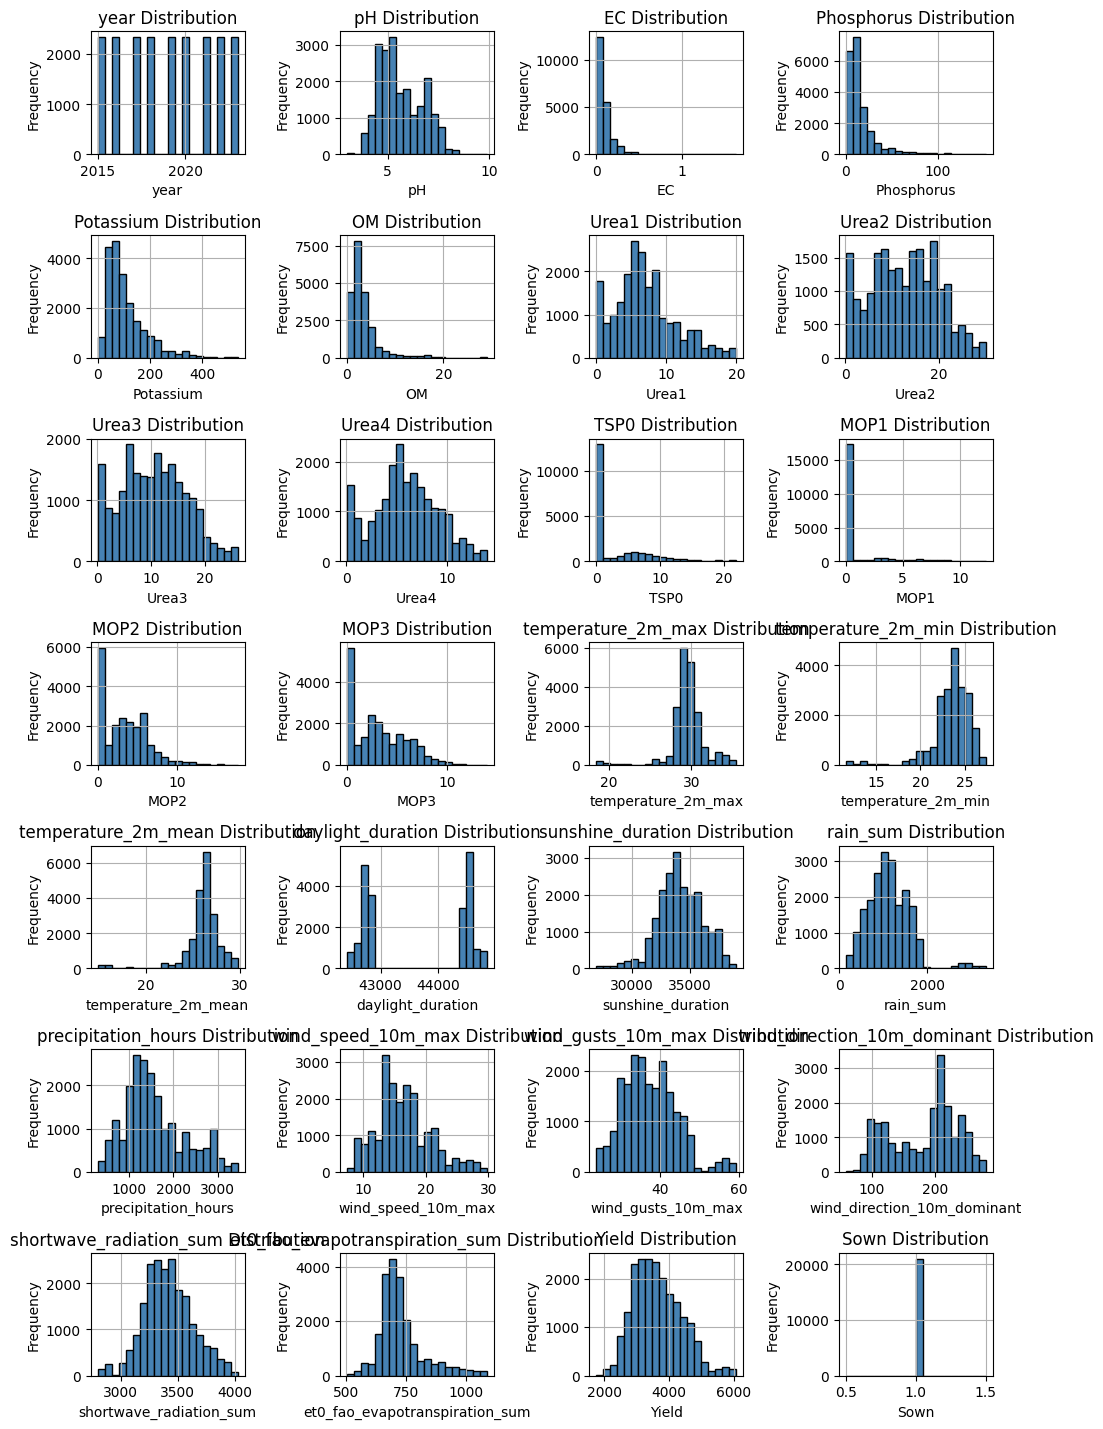

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

showdist()

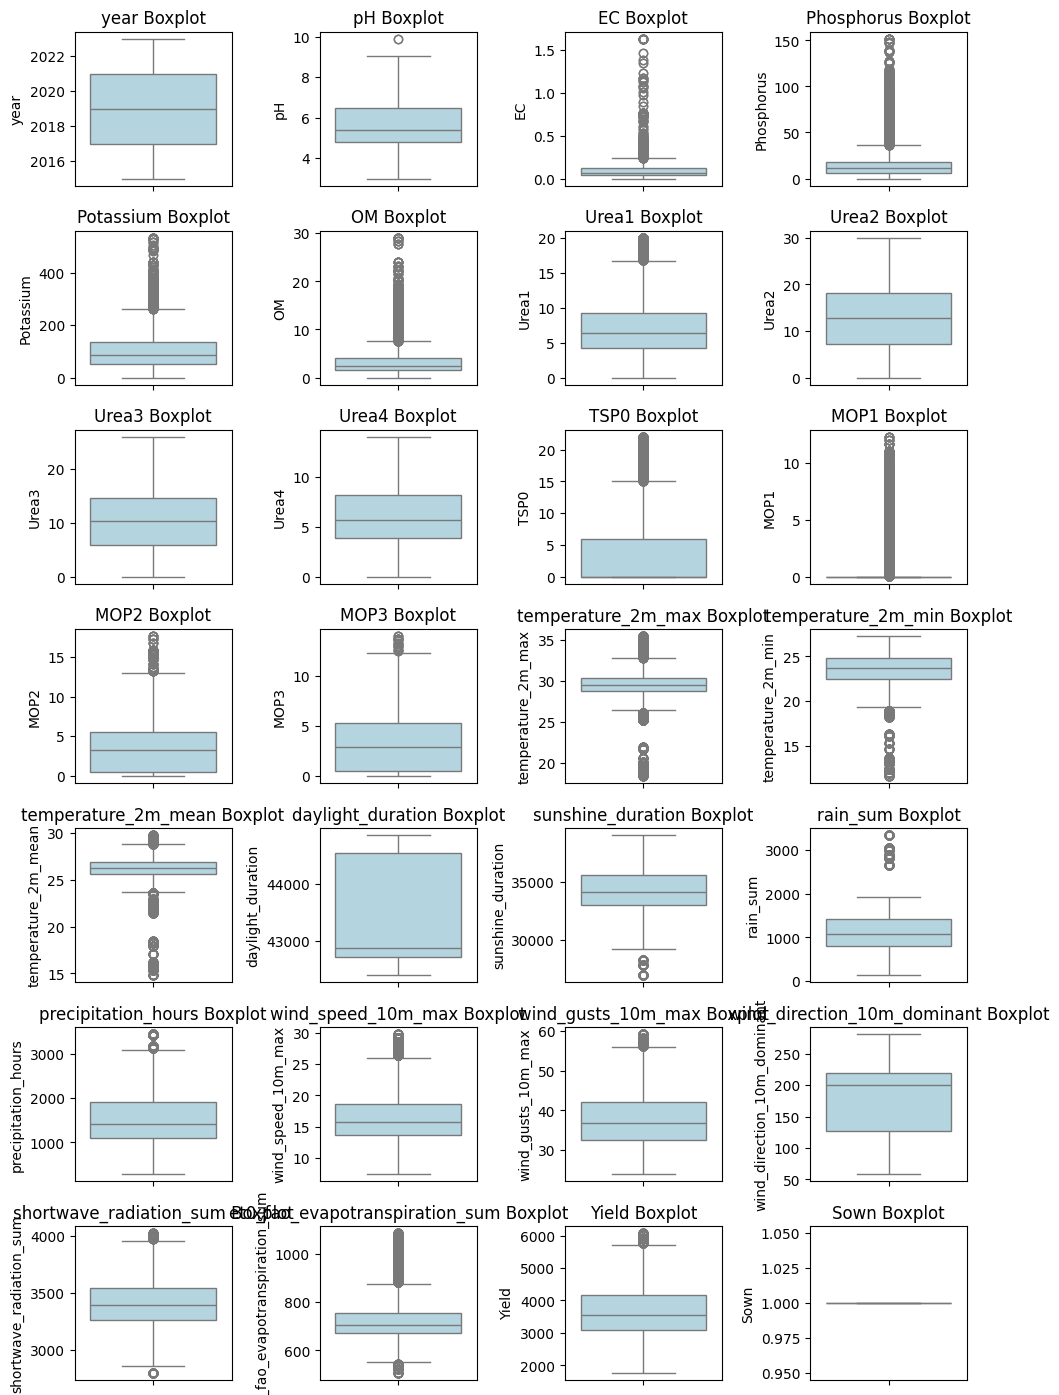

In [6]:
numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 16))
for i, col in enumerate(numerical_columns):
    plt.subplot(8, 4, i + 1)  # Adjust the number of rows and columns as necessary
    sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

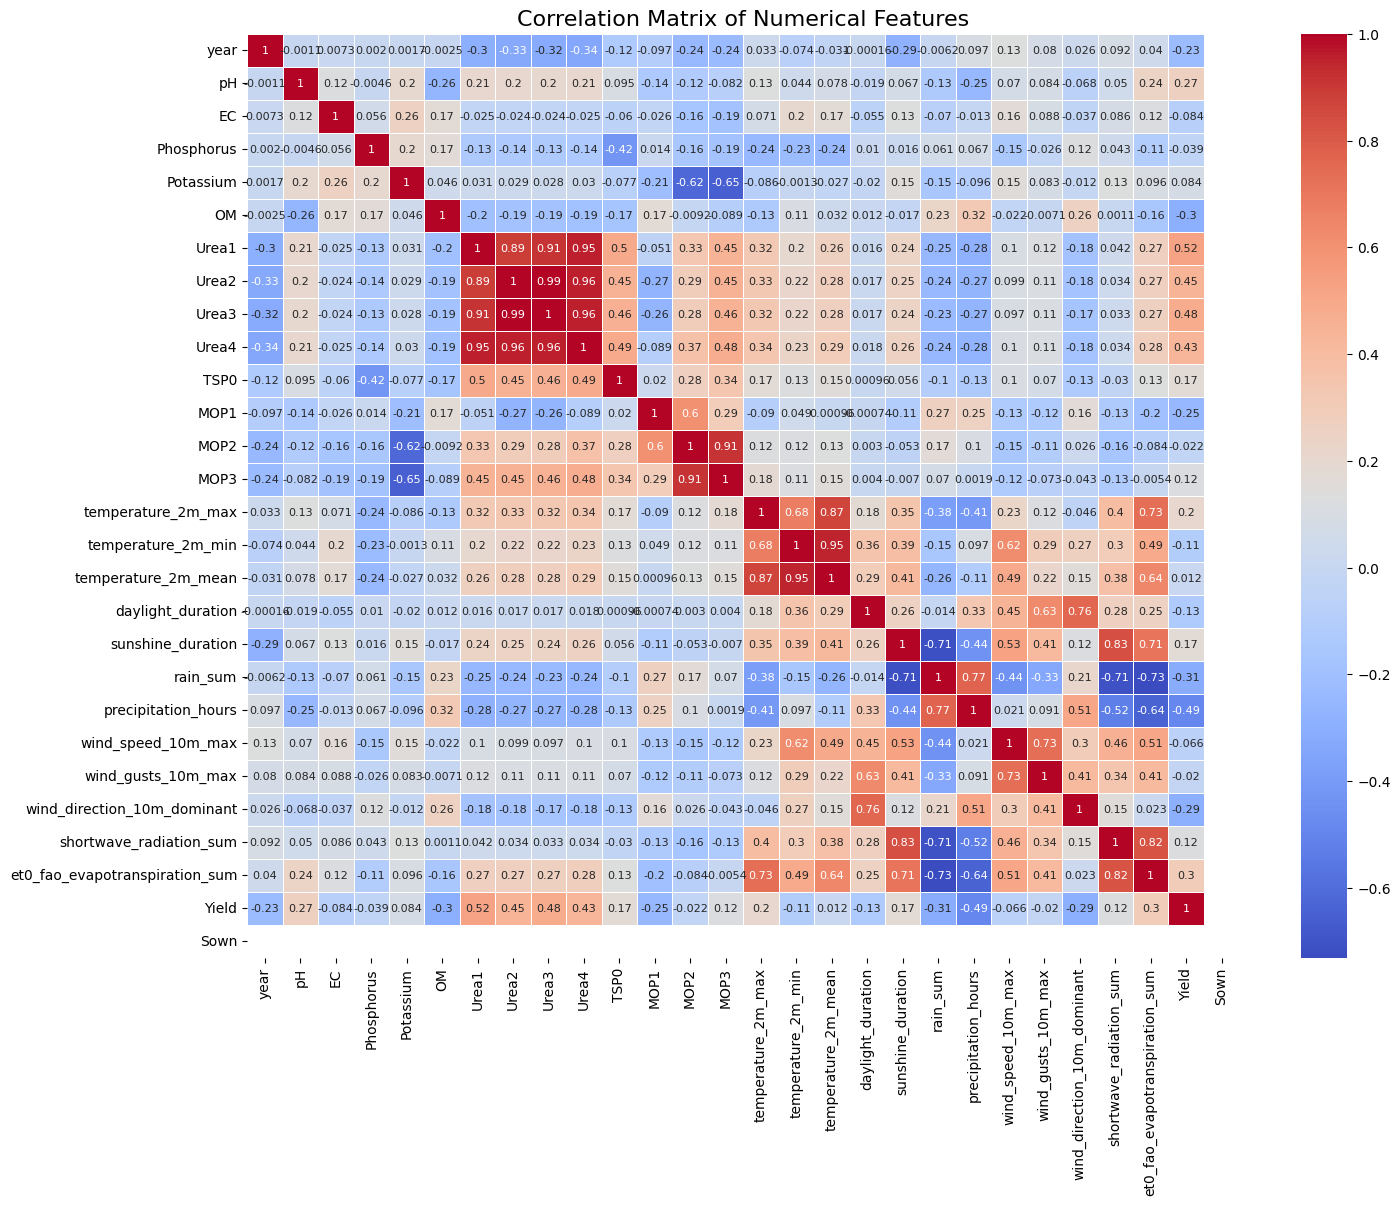

In [7]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Axes: title={'center': 'Average Yield Over Seasons'}, xlabel='year,season'>

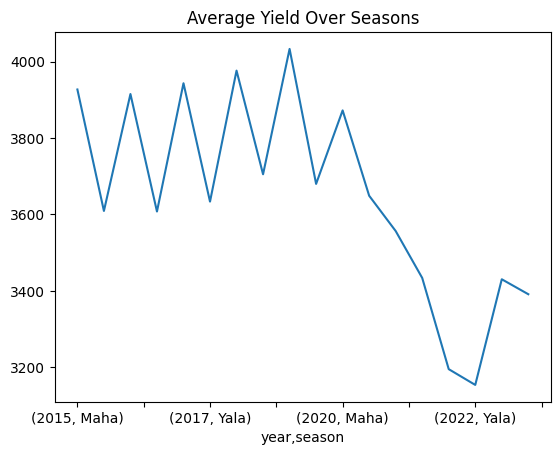

In [8]:
final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.7082 - mean_absolute_error: 0.6297 - val_loss: 0.2875 - val_mean_absolute_error: 0.4050 - learning_rate: 0.1000
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3391 - mean_absolute_error: 0.4412 - val_loss: 0.2435 - val_mean_absolute_error: 0.3607 - learning_rate: 0.1000
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2864 - mean_absolute_error: 0.4039 - val_loss: 0.2023 - val_mean_absolute_error: 0.3343 - learning_rate: 0.1000
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2720 - mean_absolute_error: 0.3965 - val_loss: 0.2021 - val_mean_absolute_error: 0.3367 - learning_rate: 0.1000
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2596 - mean_absolute_error: 0.3883 - val_loss: 0.1857 - val_mean_absolute_error: 0.3197 - learning_rate: 0.1000
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2435 - mean_absolute_error: 0.3774 - val_loss: 0.1705 - val_me

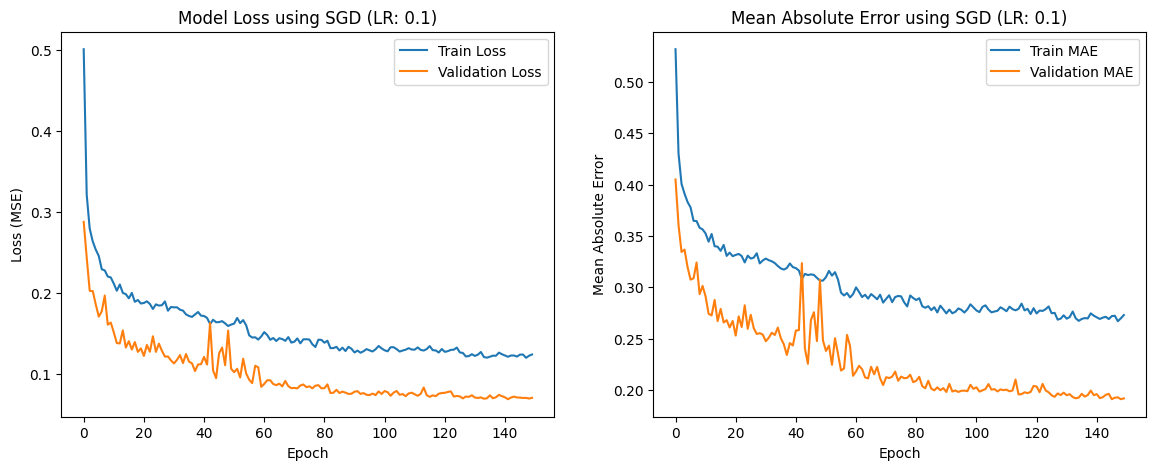

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.7058 - mean_absolute_error: 0.6252 - val_loss: 0.3075 - val_mean_absolute_error: 0.4057 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3630 - mean_absolute_error: 0.4566 - val_loss: 0.2743 - val_mean_absolute_error: 0.3847 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3342 - mean_absolute_error: 0.4388 - val_loss: 0.2530 - val_mean_absolute_error: 0.3688 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3064 - mean_absolute_error: 0.4208 - val_loss: 0.2425 - val_mean_absolute_error: 0.3632 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2966 - mean_absolute_error: 0.4124 - val_loss: 0.2385 - val_mean_absolute_error: 0.3623 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2893 - mean_absolute_error: 0.4084 - val_loss: 0.2246 - val_me

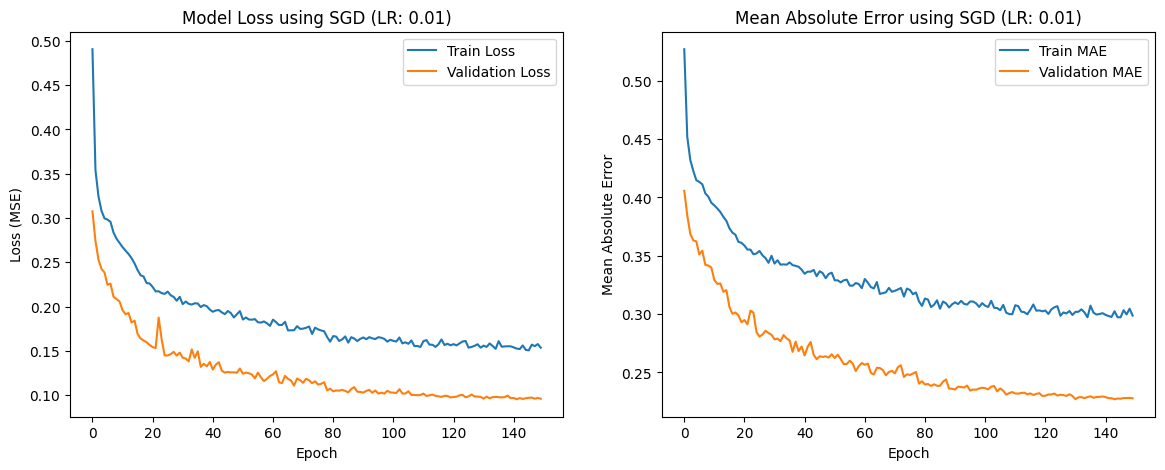

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.2976 - mean_absolute_error: 0.8746 - val_loss: 0.4082 - val_mean_absolute_error: 0.4851 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6004 - mean_absolute_error: 0.5991 - val_loss: 0.3434 - val_mean_absolute_error: 0.4398 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5037 - mean_absolute_error: 0.5440 - val_loss: 0.3246 - val_mean_absolute_error: 0.4252 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4441 - mean_absolute_error: 0.5075 - val_loss: 0.3164 - val_mean_absolute_error: 0.4183 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3953 - mean_absolute_error: 0.4817 - val_loss: 0.3099 - val_mean_absolute_error: 0.4125 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3932 - mean_absolute_error: 0.4743 - val_loss: 0.3048 - val_me

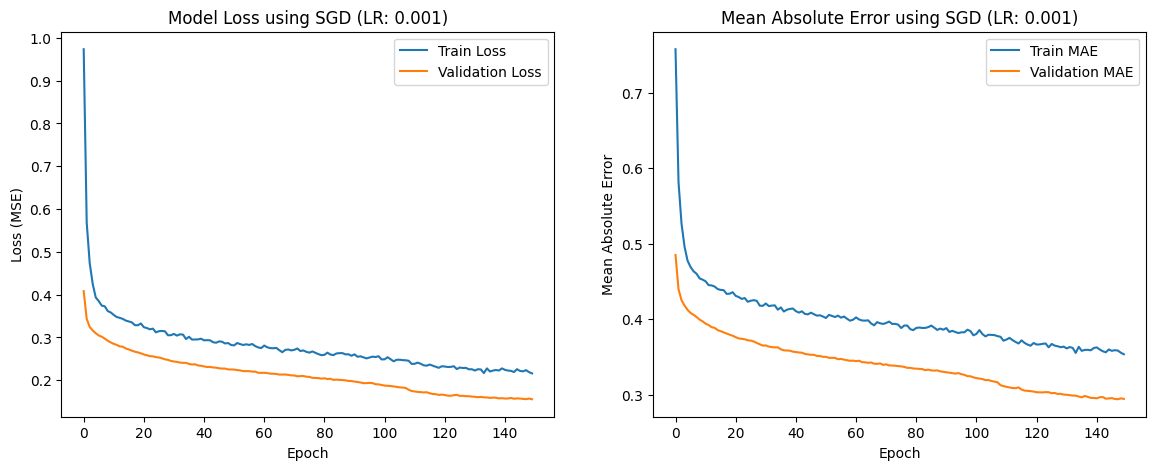

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.4322 - mean_absolute_error: 1.4654 - val_loss: 1.0603 - val_mean_absolute_error: 0.7951 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3100 - mean_absolute_error: 0.8870 - val_loss: 0.7513 - val_mean_absolute_error: 0.6564 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0573 - mean_absolute_error: 0.7920 - val_loss: 0.6445 - val_mean_absolute_error: 0.6065 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9328 - mean_absolute_error: 0.7438 - val_loss: 0.5800 - val_mean_absolute_error: 0.5749 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8606 - mean_absolute_error: 0.7183 - val_loss: 0.5394 - val_mean_absolute_error: 0.5535 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8076 - mean_absolute_error: 0.6942 - val_l

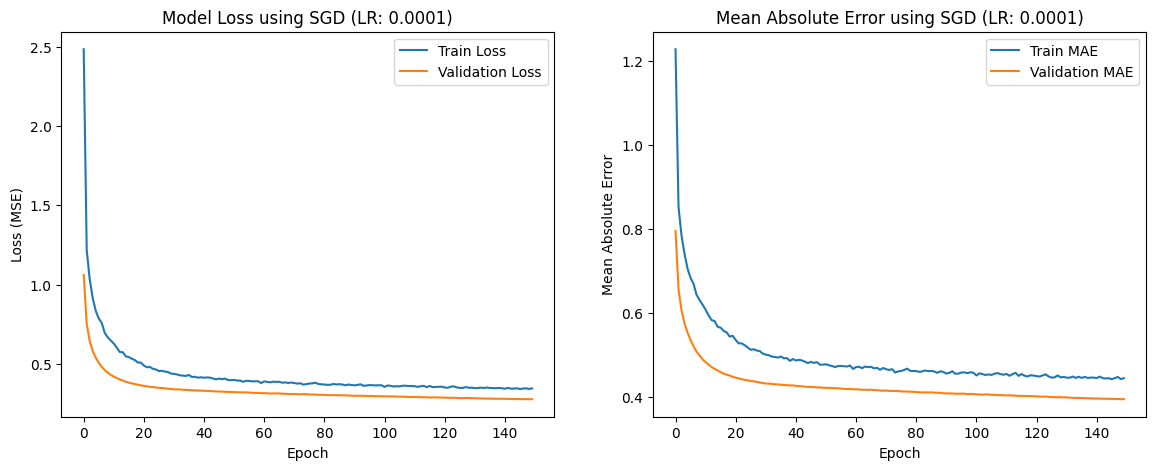

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.4557 - mean_absolute_error: 1.6621 - val_loss: 3.2332 - val_mean_absolute_error: 1.4096 - learning_rate: 1.0000e-05
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5753 - mean_absolute_error: 1.4788 - val_loss: 2.6923 - val_mean_absolute_error: 1.2859 - learning_rate: 1.0000e-05
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0434 - mean_absolute_error: 1.3631 - val_loss: 2.2514 - val_mean_absolute_error: 1.1753 - learning_rate: 1.0000e-05
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6326 - mean_absolute_error: 1.2675 - val_loss: 1.9449 - val_mean_absolute_error: 1.0905 - learning_rate: 1.0000e-05
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2908 - mean_absolute_error: 1.1878 - val_loss: 1.7044 - val_mean_absolute_error: 1.0197 - learning_rate: 1.0000e-05
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0706 - mean_absolute_error: 1.1309 - val_l

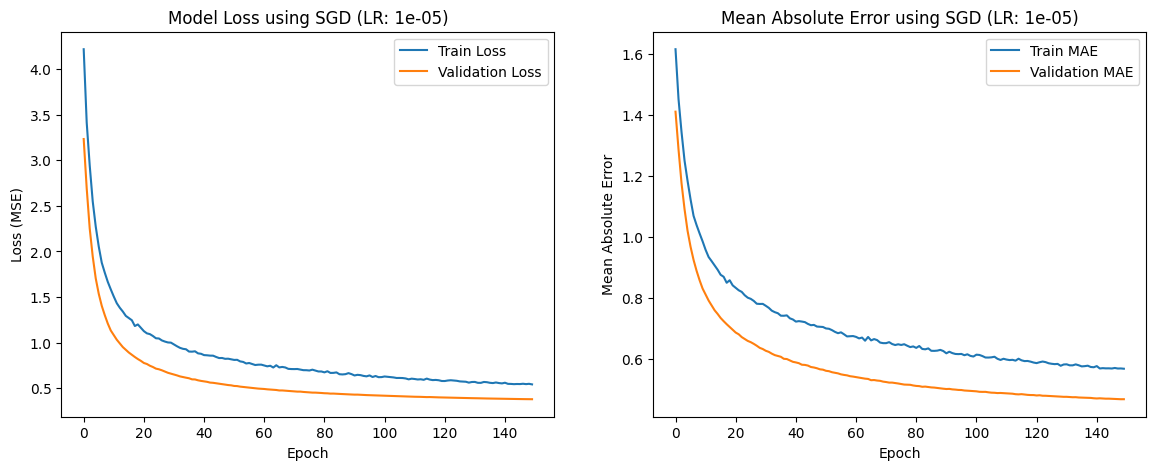

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.4439 - mean_absolute_error: 0.8667 - val_loss: 0.6508 - val_mean_absolute_error: 0.5895 - learning_rate: 0.1000
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6670 - mean_absolute_error: 0.6101 - val_loss: 0.4584 - val_mean_absolute_error: 0.5280 - learning_rate: 0.1000
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6722 - mean_absolute_error: 0.6194 - val_loss: 0.4272 - val_mean_absolute_error: 0.4995 - learning_rate: 0.1000
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6737 - mean_absolute_error: 0.6163 - val_loss: 0.4015 - val_mean_absolute_error: 0.4524 - learning_rate: 0.1000
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6428 - mean_absolute_error: 0.6062 - val_loss: 0.3922 - val_mean_absolute_error: 0.4968 - learning_rate: 0.1000
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6130 - mean_absolute_error: 0.5928 - val_loss: 0.5492 - val_me

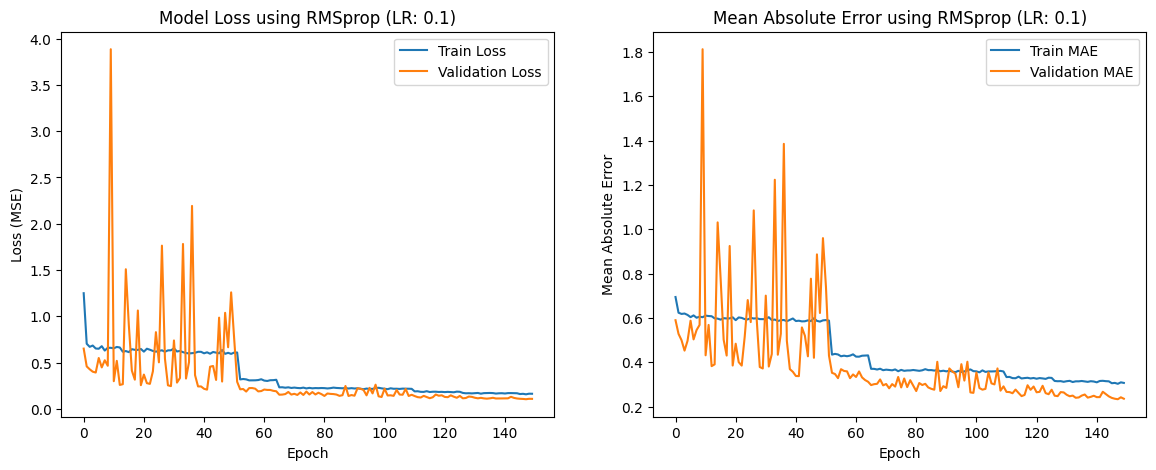

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5932 - mean_absolute_error: 0.5598 - val_loss: 0.2254 - val_mean_absolute_error: 0.3558 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2822 - mean_absolute_error: 0.3998 - val_loss: 0.2090 - val_mean_absolute_error: 0.3318 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2538 - mean_absolute_error: 0.3822 - val_loss: 0.2058 - val_mean_absolute_error: 0.3324 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2300 - mean_absolute_error: 0.3632 - val_loss: 0.1794 - val_mean_absolute_error: 0.3139 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2187 - mean_absolute_error: 0.3527 - val_loss: 0.1503 - val_mean_absolute_error: 0.2844 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2144 - mean_absolute_error: 0.3526 - val_loss: 0.1853 - val_me

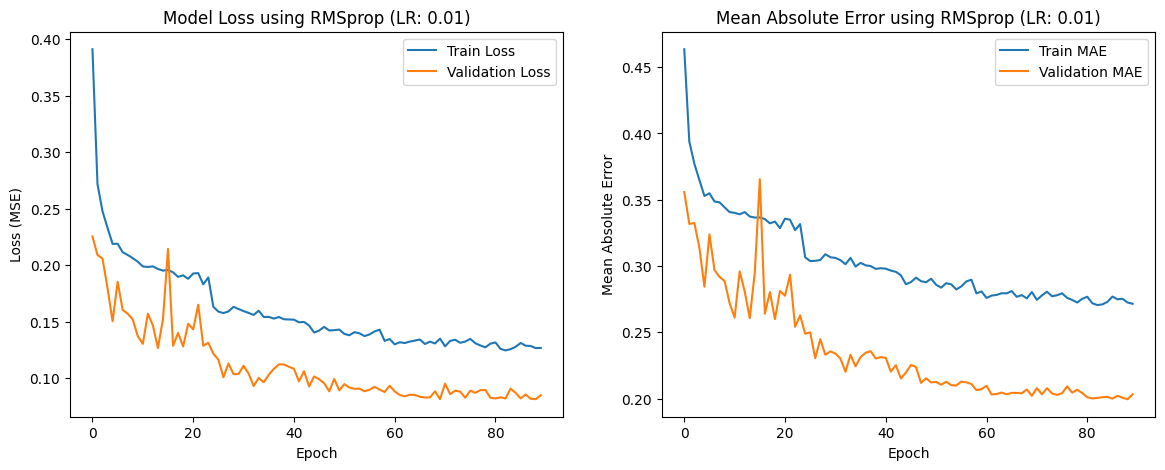

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.9083 - mean_absolute_error: 0.7199 - val_loss: 0.2570 - val_mean_absolute_error: 0.3768 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3376 - mean_absolute_error: 0.4445 - val_loss: 0.2310 - val_mean_absolute_error: 0.3548 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2938 - mean_absolute_error: 0.4121 - val_loss: 0.2106 - val_mean_absolute_error: 0.3413 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2591 - mean_absolute_error: 0.3887 - val_loss: 0.1886 - val_mean_absolute_error: 0.3256 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2370 - mean_absolute_error: 0.3716 - val_loss: 0.1734 - val_mean_absolute_error: 0.3115 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2268 - mean_absolute_error: 0.3635 - val_loss: 0.1598 - val_me

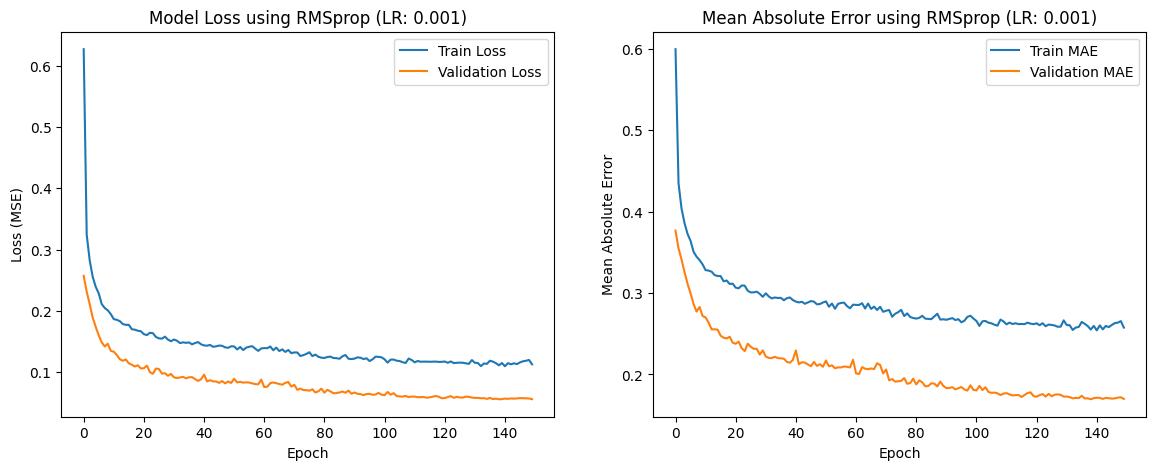

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6563 - mean_absolute_error: 1.2690 - val_loss: 0.5791 - val_mean_absolute_error: 0.5824 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9238 - mean_absolute_error: 0.7419 - val_loss: 0.4132 - val_mean_absolute_error: 0.4884 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7186 - mean_absolute_error: 0.6563 - val_loss: 0.3485 - val_mean_absolute_error: 0.4463 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6386 - mean_absolute_error: 0.6163 - val_loss: 0.3155 - val_mean_absolute_error: 0.4233 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5558 - mean_absolute_error: 0.5735 - val_loss: 0.2913 - val_mean_absolute_error: 0.4042 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4845 - mean_absolute_error: 0.5350 - val_l

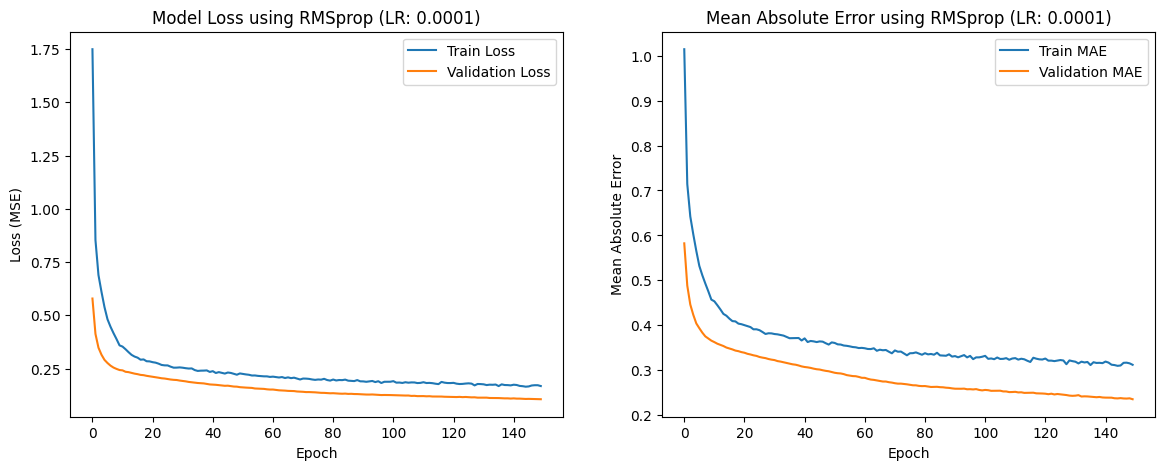

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.5245 - mean_absolute_error: 1.5097 - val_loss: 2.3856 - val_mean_absolute_error: 1.2441 - learning_rate: 1.0000e-05
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7309 - mean_absolute_error: 1.3221 - val_loss: 1.8110 - val_mean_absolute_error: 1.0763 - learning_rate: 1.0000e-05
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1324 - mean_absolute_error: 1.1592 - val_loss: 1.4089 - val_mean_absolute_error: 0.9390 - learning_rate: 1.0000e-05
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8278 - mean_absolute_error: 1.0652 - val_loss: 1.1651 - val_mean_absolute_error: 0.8464 - learning_rate: 1.0000e-05
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5597 - mean_absolute_error: 0.9851 - val_loss: 0.9814 - val_mean_absolute_error: 0.7725 - learning_rate: 1.0000e-05
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3966 - mean_absolute_error: 0.9237 - val_l

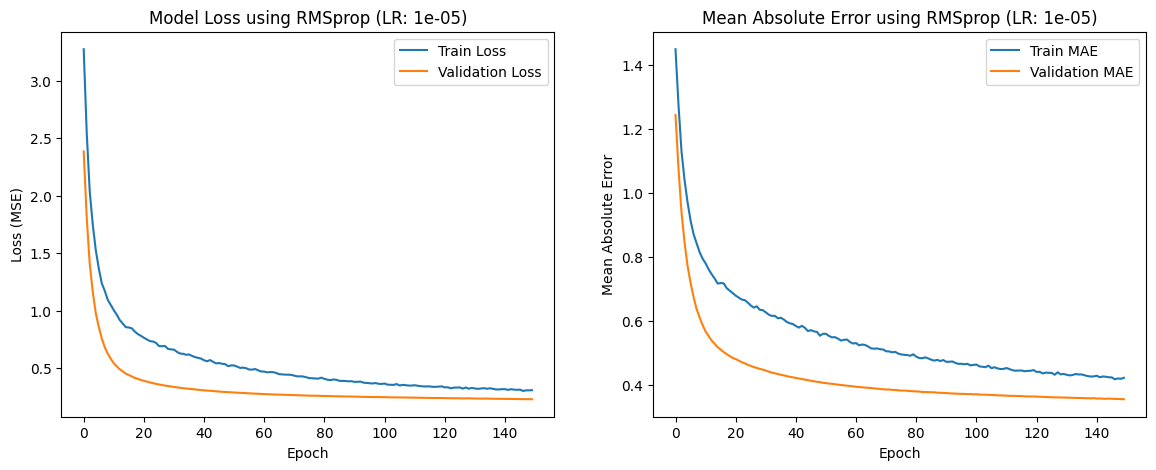

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6838 - mean_absolute_error: 0.5663 - val_loss: 0.2547 - val_mean_absolute_error: 0.3689 - learning_rate: 0.1000
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2918 - mean_absolute_error: 0.4099 - val_loss: 0.2149 - val_mean_absolute_error: 0.3435 - learning_rate: 0.1000
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2606 - mean_absolute_error: 0.3859 - val_loss: 0.1957 - val_mean_absolute_error: 0.3298 - learning_rate: 0.1000
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2585 - mean_absolute_error: 0.3861 - val_loss: 0.1859 - val_mean_absolute_error: 0.3160 - learning_rate: 0.1000
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2427 - mean_absolute_error: 0.3724 - val_loss: 0.1713 - val_mean_absolute_error: 0.3079 - learning_rate: 0.1000
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2280 - mean_absolute_error: 0.3610 - val_loss: 0.1676 - val_me

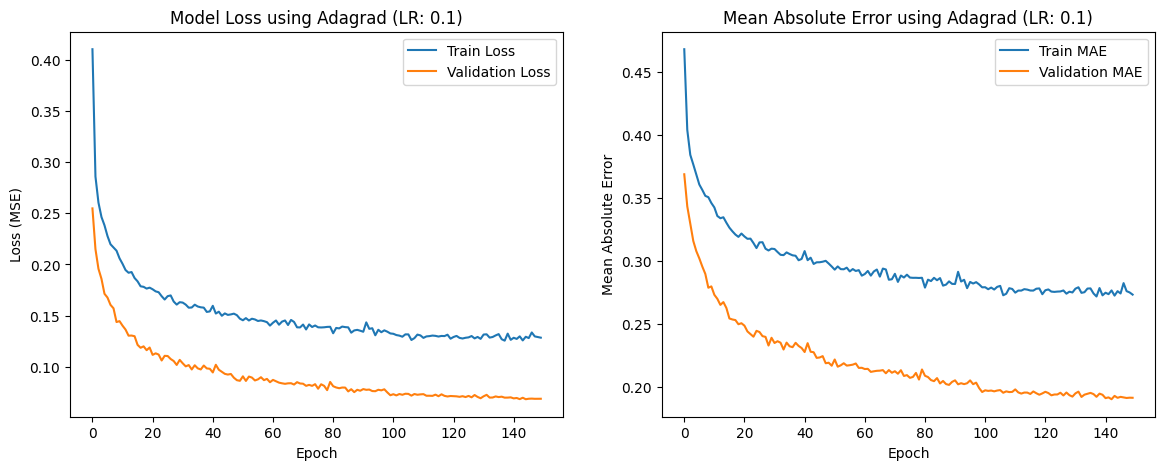

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8744 - mean_absolute_error: 0.7093 - val_loss: 0.2946 - val_mean_absolute_error: 0.4040 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4313 - mean_absolute_error: 0.5042 - val_loss: 0.2677 - val_mean_absolute_error: 0.3838 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3761 - mean_absolute_error: 0.4704 - val_loss: 0.2577 - val_mean_absolute_error: 0.3750 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3414 - mean_absolute_error: 0.4443 - val_loss: 0.2483 - val_mean_absolute_error: 0.3681 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3236 - mean_absolute_error: 0.4341 - val_loss: 0.2435 - val_mean_absolute_error: 0.3642 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3052 - mean_absolute_error: 0.4188 - val_loss: 0.2349 - val_me

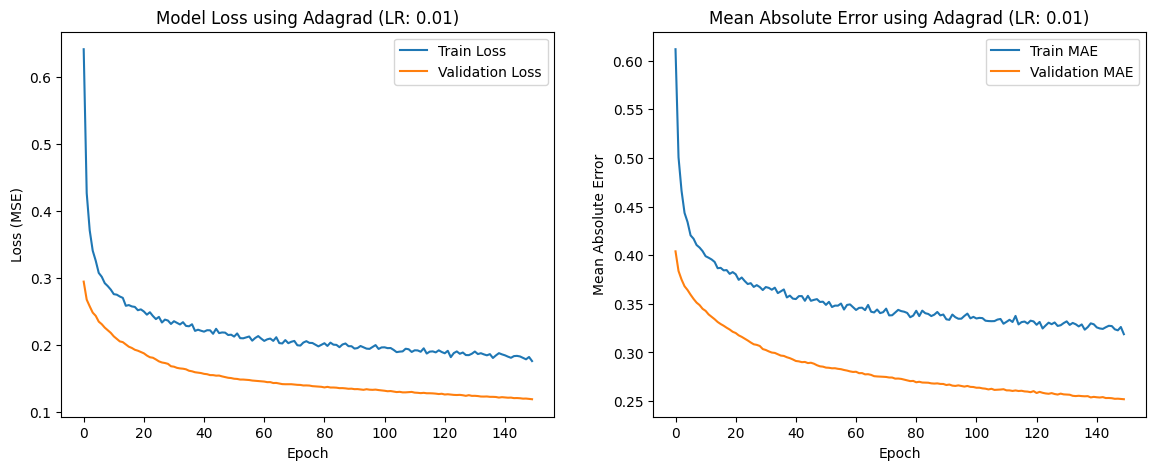

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6632 - mean_absolute_error: 1.0022 - val_loss: 0.6640 - val_mean_absolute_error: 0.6364 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2348 - mean_absolute_error: 0.8624 - val_loss: 0.5681 - val_mean_absolute_error: 0.5856 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0616 - mean_absolute_error: 0.8085 - val_loss: 0.5159 - val_mean_absolute_error: 0.5560 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0422 - mean_absolute_error: 0.7979 - val_loss: 0.4844 - val_mean_absolute_error: 0.5380 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0156 - mean_absolute_error: 0.7874 - val_loss: 0.4545 - val_mean_absolute_error: 0.5189 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9371 - mean_absolute_error: 0.7553 - val_loss: 0.4340 - val_me

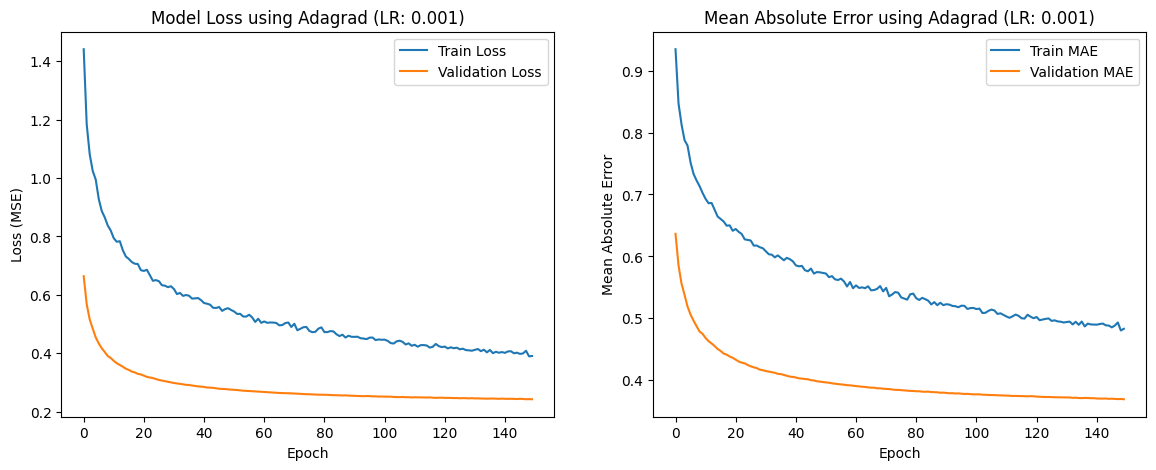

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1618 - mean_absolute_error: 1.1611 - val_loss: 1.4844 - val_mean_absolute_error: 0.9607 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9907 - mean_absolute_error: 1.1149 - val_loss: 1.4155 - val_mean_absolute_error: 0.9363 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8948 - mean_absolute_error: 1.0867 - val_loss: 1.3521 - val_mean_absolute_error: 0.9155 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7926 - mean_absolute_error: 1.0551 - val_loss: 1.2971 - val_mean_absolute_error: 0.8966 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7852 - mean_absolute_error: 1.0500 - val_loss: 1.2593 - val_mean_absolute_error: 0.8805 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7724 - mean_absolute_error: 1.0436 - val_l

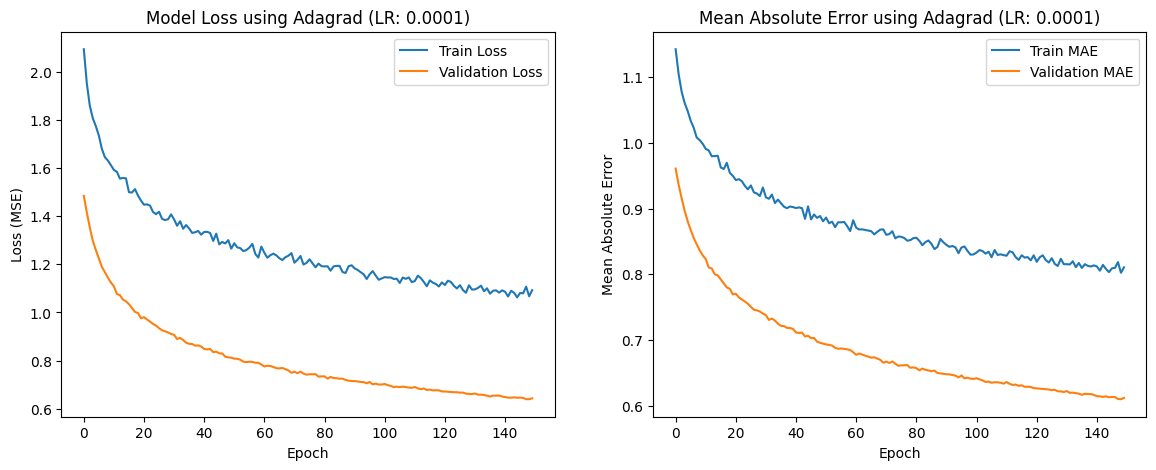

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.4495 - mean_absolute_error: 1.6748 - val_loss: 3.9131 - val_mean_absolute_error: 1.5524 - learning_rate: 1.0000e-05
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4110 - mean_absolute_error: 1.6622 - val_loss: 3.8783 - val_mean_absolute_error: 1.5511 - learning_rate: 1.0000e-05
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2371 - mean_absolute_error: 1.6310 - val_loss: 3.7940 - val_mean_absolute_error: 1.5316 - learning_rate: 1.0000e-05
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3242 - mean_absolute_error: 1.6434 - val_loss: 3.8166 - val_mean_absolute_error: 1.5359 - learning_rate: 1.0000e-05
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2502 - mean_absolute_error: 1.6273 - val_loss: 3.7739 - val_mean_absolute_error: 1.5281 - learning_rate: 1.0000e-05
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2046 - mean_absolute_error: 1.6182 - val_l

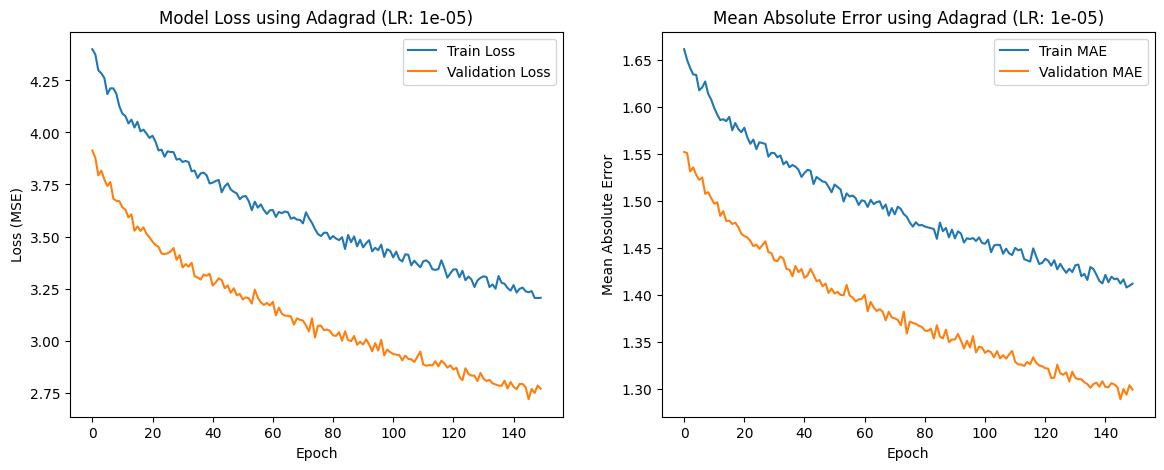

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8740 - mean_absolute_error: 0.6442 - val_loss: 0.2950 - val_mean_absolute_error: 0.4137 - learning_rate: 0.1000
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3766 - mean_absolute_error: 0.4652 - val_loss: 0.3231 - val_mean_absolute_error: 0.4180 - learning_rate: 0.1000
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3987 - mean_absolute_error: 0.4831 - val_loss: 0.2536 - val_mean_absolute_error: 0.3756 - learning_rate: 0.1000
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3921 - mean_absolute_error: 0.4777 - val_loss: 0.2660 - val_mean_absolute_error: 0.3827 - learning_rate: 0.1000
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3968 - mean_absolute_error: 0.4805 - val_loss: 0.2866 - val_mean_absolute_error: 0.4114 - learning_rate: 0.1000
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3870 - mean_absolute_error: 0.4777 - val_loss: 0.2355 - val_me

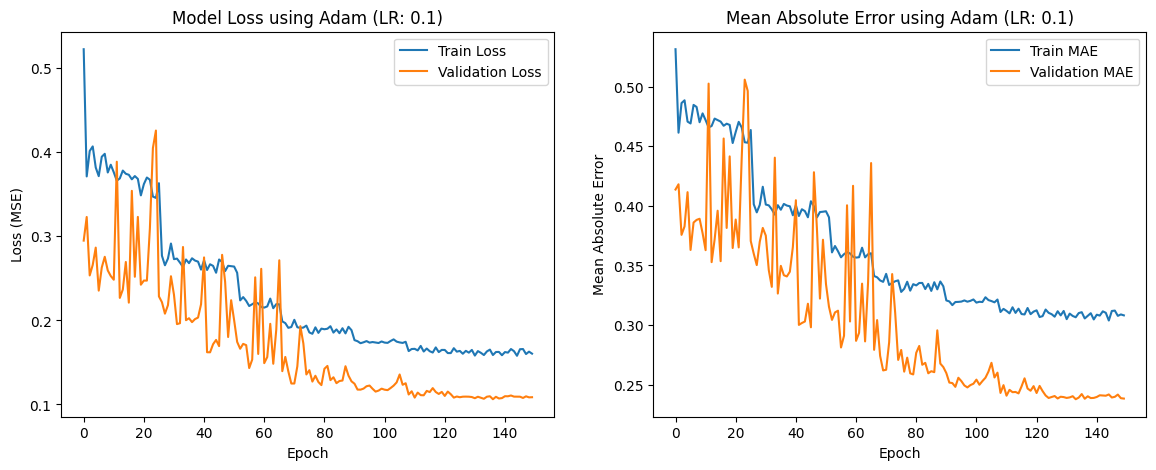

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5786 - mean_absolute_error: 0.5520 - val_loss: 0.2166 - val_mean_absolute_error: 0.3500 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2802 - mean_absolute_error: 0.4015 - val_loss: 0.2043 - val_mean_absolute_error: 0.3365 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2516 - mean_absolute_error: 0.3798 - val_loss: 0.1913 - val_mean_absolute_error: 0.3286 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2584 - mean_absolute_error: 0.3836 - val_loss: 0.2360 - val_mean_absolute_error: 0.3618 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2428 - mean_absolute_error: 0.3721 - val_loss: 0.1697 - val_mean_absolute_error: 0.2997 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2244 - mean_absolute_error: 0.3589 - val_loss: 0.1567 - val_me

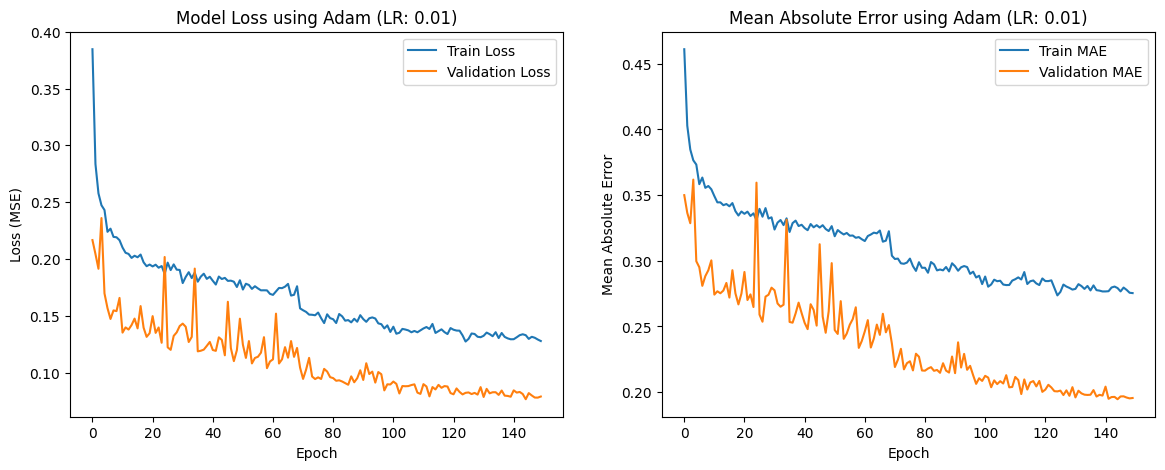

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1046 - mean_absolute_error: 0.7935 - val_loss: 0.2797 - val_mean_absolute_error: 0.3884 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3986 - mean_absolute_error: 0.4794 - val_loss: 0.2438 - val_mean_absolute_error: 0.3612 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3165 - mean_absolute_error: 0.4258 - val_loss: 0.2235 - val_mean_absolute_error: 0.3456 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2724 - mean_absolute_error: 0.3929 - val_loss: 0.2115 - val_mean_absolute_error: 0.3359 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2613 - mean_absolute_error: 0.3846 - val_loss: 0.1957 - val_mean_absolute_error: 0.3244 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2473 - mean_absolute_error: 0.3741 - val_loss: 0.1839 - val_me

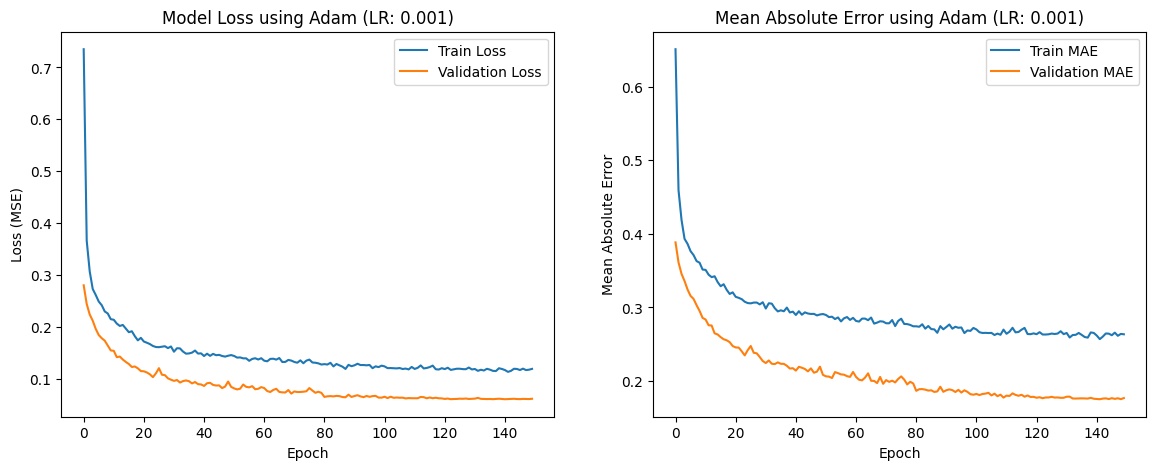

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.2022 - mean_absolute_error: 1.1565 - val_loss: 0.6279 - val_mean_absolute_error: 0.6062 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9603 - mean_absolute_error: 0.7611 - val_loss: 0.4547 - val_mean_absolute_error: 0.5117 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7798 - mean_absolute_error: 0.6865 - val_loss: 0.3779 - val_mean_absolute_error: 0.4642 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6836 - mean_absolute_error: 0.6376 - val_loss: 0.3328 - val_mean_absolute_error: 0.4327 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6013 - mean_absolute_error: 0.5993 - val_loss: 0.3048 - val_mean_absolute_error: 0.4134 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5458 - mean_absolute_error: 0.5732 - val_l

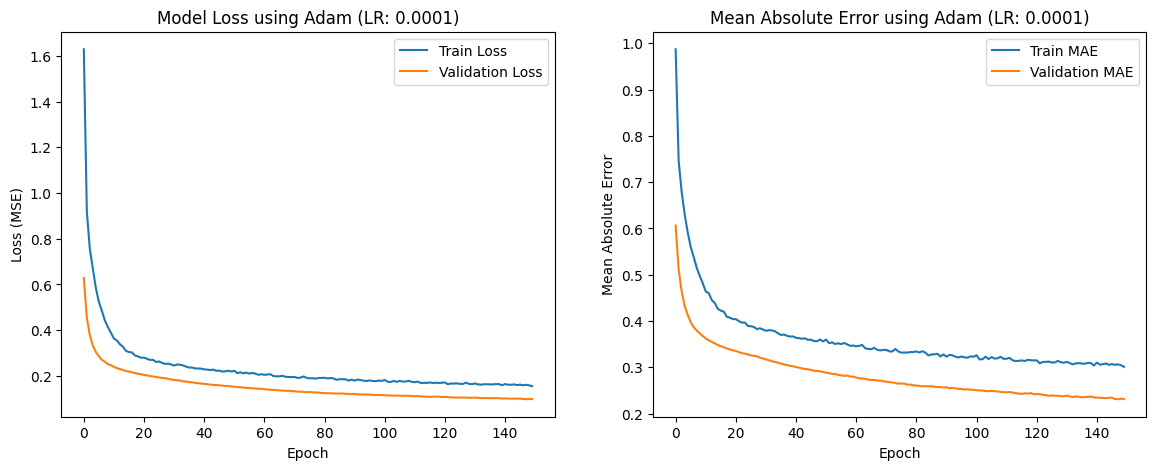

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8933 - mean_absolute_error: 1.0560 - val_loss: 1.1386 - val_mean_absolute_error: 0.7972 - learning_rate: 1.0000e-05
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5303 - mean_absolute_error: 0.9429 - val_loss: 0.9458 - val_mean_absolute_error: 0.7192 - learning_rate: 1.0000e-05
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3715 - mean_absolute_error: 0.8906 - val_loss: 0.8217 - val_mean_absolute_error: 0.6663 - learning_rate: 1.0000e-05
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2137 - mean_absolute_error: 0.8392 - val_loss: 0.7325 - val_mean_absolute_error: 0.6276 - learning_rate: 1.0000e-05
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1216 - mean_absolute_error: 0.8107 - val_loss: 0.6769 - val_mean_absolute_error: 0.6030 - learning_rate: 1.0000e-05
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1237 - mean_absolute_error: 0.8068 - val_l

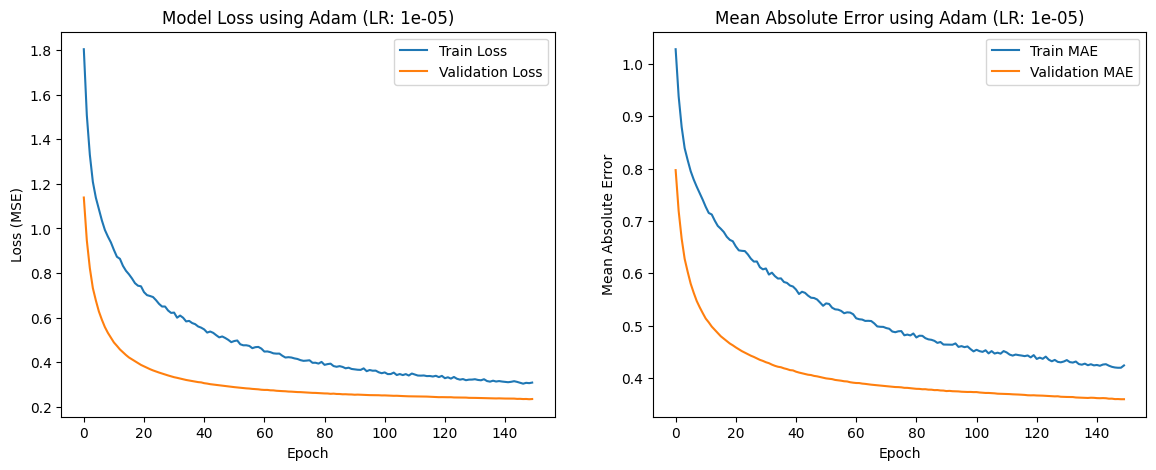

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8771 - mean_absolute_error: 0.5687 - val_loss: 0.3669 - val_mean_absolute_error: 0.4720 - learning_rate: 0.1000
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3365 - mean_absolute_error: 0.4421 - val_loss: 0.2792 - val_mean_absolute_error: 0.4032 - learning_rate: 0.1000
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3201 - mean_absolute_error: 0.4278 - val_loss: 0.2283 - val_mean_absolute_error: 0.3591 - learning_rate: 0.1000
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3312 - mean_absolute_error: 0.4368 - val_loss: 0.2570 - val_mean_absolute_error: 0.3847 - learning_rate: 0.1000
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3186 - mean_absolute_error: 0.4303 - val_loss: 0.2489 - val_mean_absolute_error: 0.3745 - learning_rate: 0.1000
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3354 - mean_absolute_error: 0.4399 - val_loss: 0.2645 - val_me

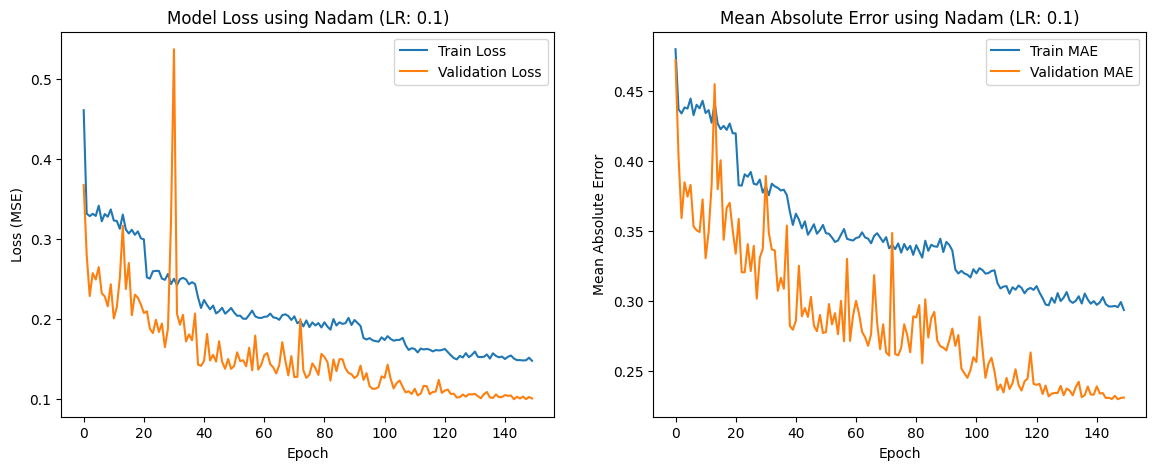

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6262 - mean_absolute_error: 0.5659 - val_loss: 0.2323 - val_mean_absolute_error: 0.3569 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2789 - mean_absolute_error: 0.4021 - val_loss: 0.2058 - val_mean_absolute_error: 0.3375 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2586 - mean_absolute_error: 0.3843 - val_loss: 0.1898 - val_mean_absolute_error: 0.3197 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2529 - mean_absolute_error: 0.3786 - val_loss: 0.1736 - val_mean_absolute_error: 0.3115 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2383 - mean_absolute_error: 0.3696 - val_loss: 0.1683 - val_mean_absolute_error: 0.3039 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2369 - mean_absolute_error: 0.3681 - val_loss: 0.1627 - val_me

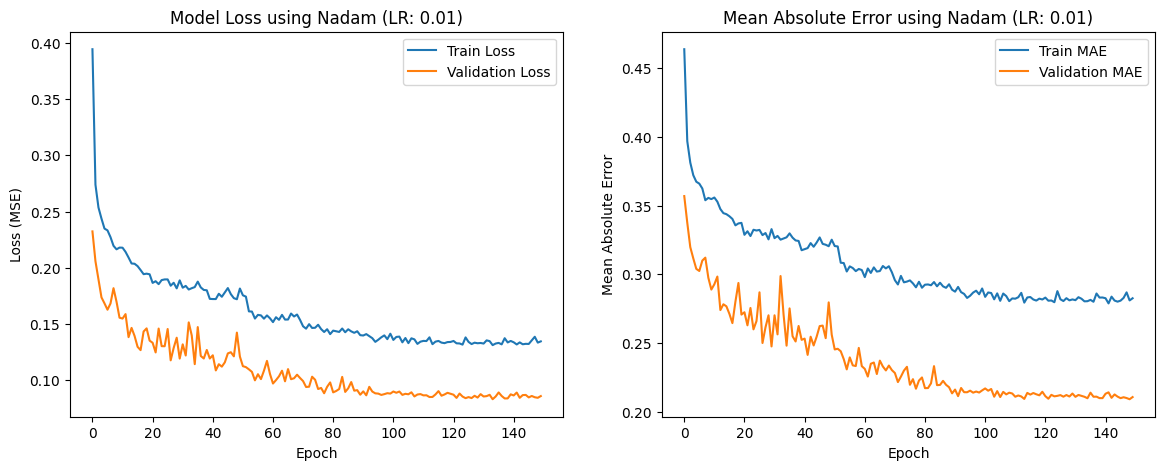

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3861 - mean_absolute_error: 0.8773 - val_loss: 0.2771 - val_mean_absolute_error: 0.3947 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4101 - mean_absolute_error: 0.4926 - val_loss: 0.2475 - val_mean_absolute_error: 0.3729 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3236 - mean_absolute_error: 0.4384 - val_loss: 0.2241 - val_mean_absolute_error: 0.3495 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2903 - mean_absolute_error: 0.4099 - val_loss: 0.2102 - val_mean_absolute_error: 0.3400 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2593 - mean_absolute_error: 0.3863 - val_loss: 0.2002 - val_mean_absolute_error: 0.3293 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2431 - mean_absolute_error: 0.3730 - val_loss: 0.1903 - val_me

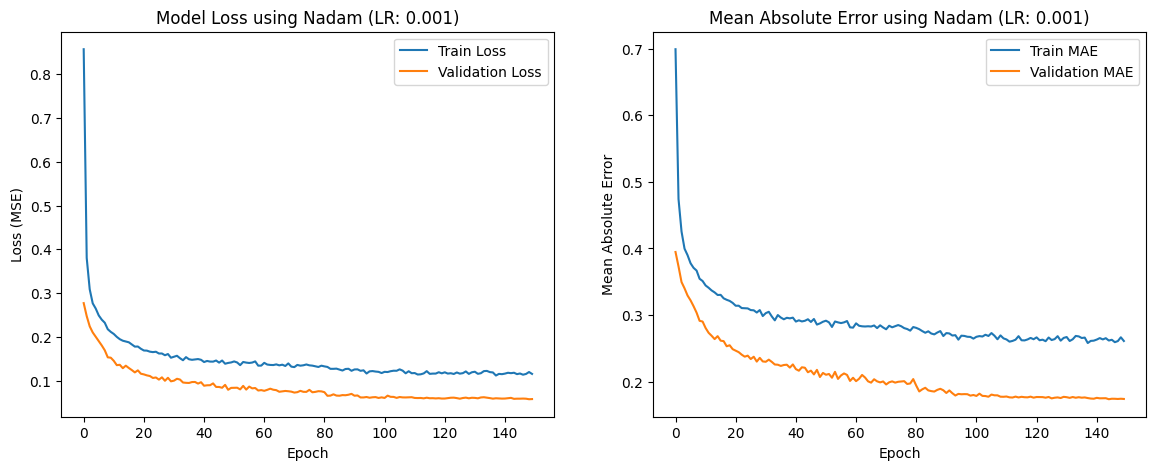

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0505 - mean_absolute_error: 1.1021 - val_loss: 0.6136 - val_mean_absolute_error: 0.6025 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0062 - mean_absolute_error: 0.7813 - val_loss: 0.4360 - val_mean_absolute_error: 0.5061 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8075 - mean_absolute_error: 0.6990 - val_loss: 0.3664 - val_mean_absolute_error: 0.4623 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7144 - mean_absolute_error: 0.6553 - val_loss: 0.3245 - val_mean_absolute_error: 0.4323 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6093 - mean_absolute_error: 0.6044 - val_loss: 0.2990 - val_mean_absolute_error: 0.4142 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5521 - mean_absolute_error: 0.5772 - val_l

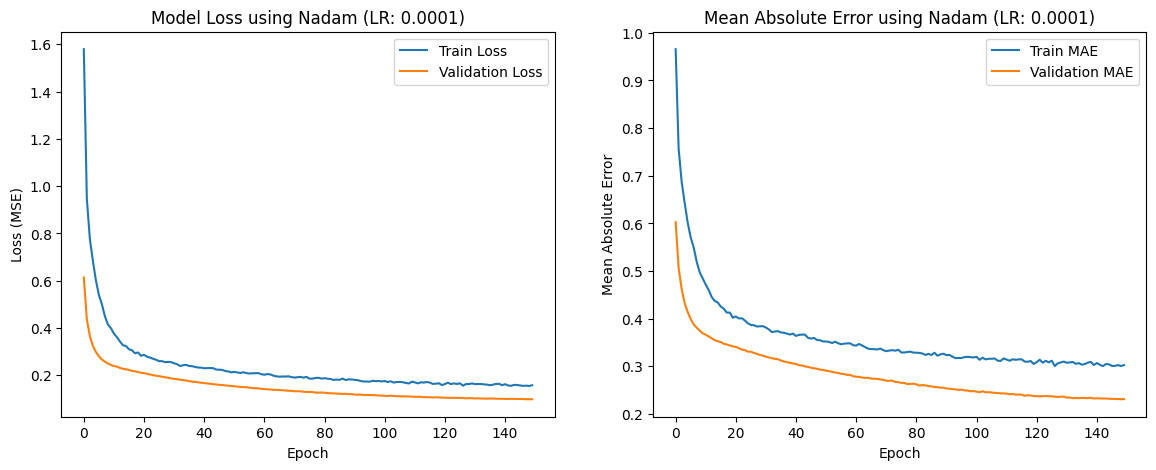

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.9479 - mean_absolute_error: 1.3672 - val_loss: 1.8934 - val_mean_absolute_error: 1.1117 - learning_rate: 1.0000e-05
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1909 - mean_absolute_error: 1.1749 - val_loss: 1.4349 - val_mean_absolute_error: 0.9554 - learning_rate: 1.0000e-05
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7496 - mean_absolute_error: 1.0392 - val_loss: 1.1226 - val_mean_absolute_error: 0.8311 - learning_rate: 1.0000e-05
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4409 - mean_absolute_error: 0.9389 - val_loss: 0.9337 - val_mean_absolute_error: 0.7486 - learning_rate: 1.0000e-05
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3209 - mean_absolute_error: 0.8877 - val_loss: 0.8214 - val_mean_absolute_error: 0.6958 - learning_rate: 1.0000e-05
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1984 - mean_absolute_error: 0.8508 - val_l

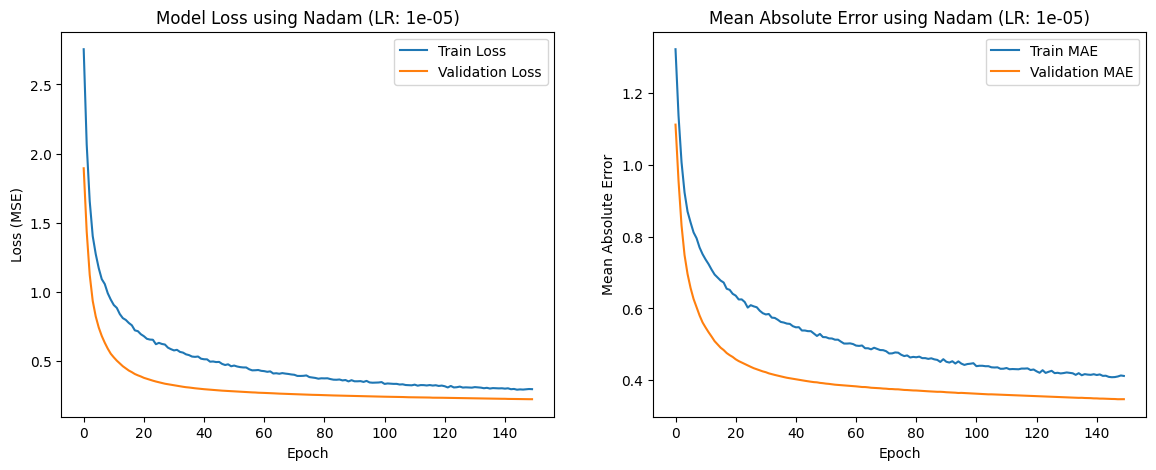

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7694 - mean_absolute_error: 0.5987 - val_loss: 0.2833 - val_mean_absolute_error: 0.3955 - learning_rate: 0.1000
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3373 - mean_absolute_error: 0.4408 - val_loss: 0.2779 - val_mean_absolute_error: 0.3843 - learning_rate: 0.1000
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3004 - mean_absolute_error: 0.4185 - val_loss: 0.2202 - val_mean_absolute_error: 0.3531 - learning_rate: 0.1000
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2985 - mean_absolute_error: 0.4145 - val_loss: 0.2244 - val_mean_absolute_error: 0.3497 - learning_rate: 0.1000
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2868 - mean_absolute_error: 0.4087 - val_loss: 0.2112 - val_mean_absolute_error: 0.3431 - learning_rate: 0.1000
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2691 - mean_absolute_error: 0.3941 - val_loss: 0.2040 - val_me

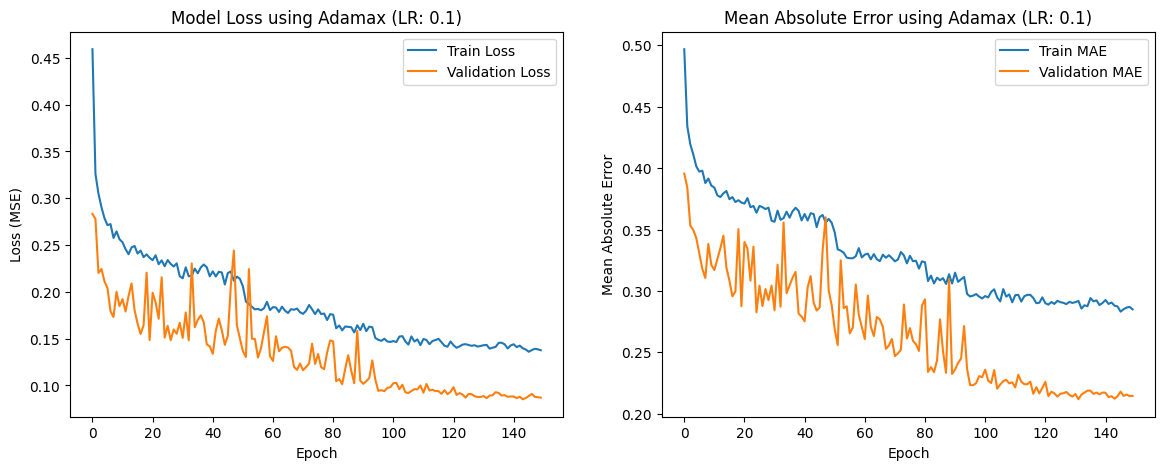

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7780 - mean_absolute_error: 0.6482 - val_loss: 0.2659 - val_mean_absolute_error: 0.3819 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3020 - mean_absolute_error: 0.4148 - val_loss: 0.2204 - val_mean_absolute_error: 0.3486 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2717 - mean_absolute_error: 0.3939 - val_loss: 0.2294 - val_mean_absolute_error: 0.3461 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2560 - mean_absolute_error: 0.3831 - val_loss: 0.1763 - val_mean_absolute_error: 0.3116 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2488 - mean_absolute_error: 0.3770 - val_loss: 0.1779 - val_mean_absolute_error: 0.3101 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2253 - mean_absolute_error: 0.3578 - val_loss: 0.1609 - val_me

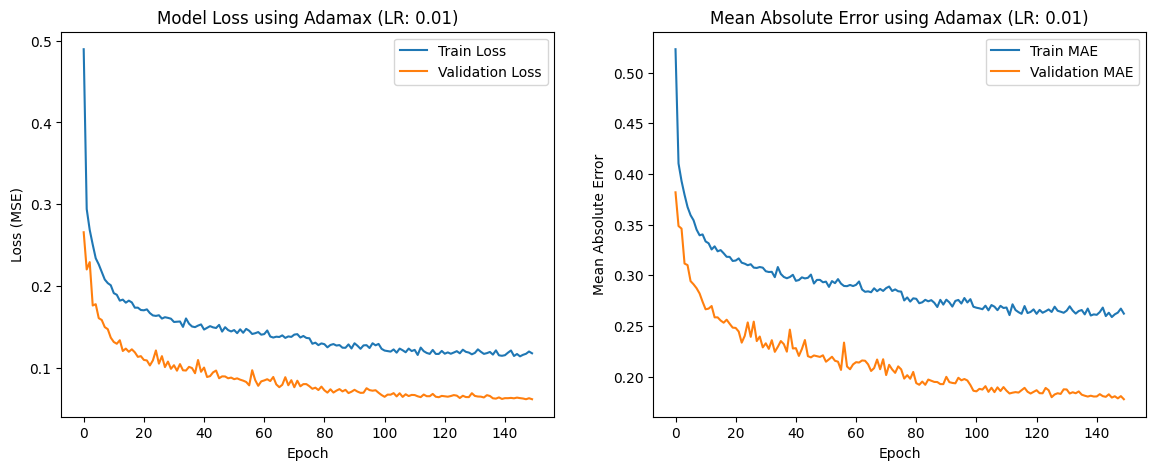

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8187 - mean_absolute_error: 1.0232 - val_loss: 0.4256 - val_mean_absolute_error: 0.4908 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6928 - mean_absolute_error: 0.6414 - val_loss: 0.3086 - val_mean_absolute_error: 0.4134 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4819 - mean_absolute_error: 0.5297 - val_loss: 0.2719 - val_mean_absolute_error: 0.3863 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3785 - mean_absolute_error: 0.4689 - val_loss: 0.2527 - val_mean_absolute_error: 0.3726 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3432 - mean_absolute_error: 0.4460 - val_loss: 0.2418 - val_mean_absolute_error: 0.3660 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3270 - mean_absolute_error: 0.4303 - val_loss: 0.2325 - val_me

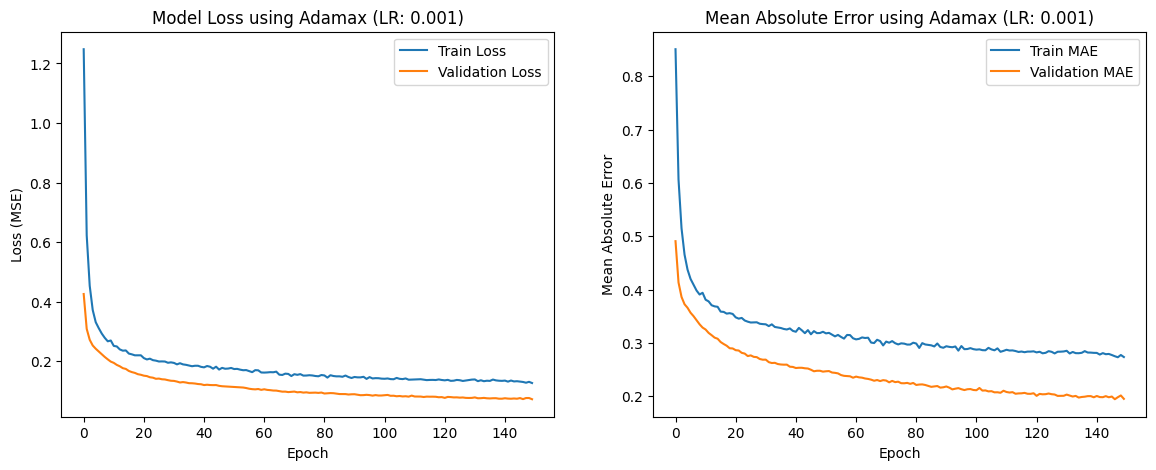

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.2464 - mean_absolute_error: 1.5531 - val_loss: 1.5836 - val_mean_absolute_error: 0.9455 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8050 - mean_absolute_error: 1.0255 - val_loss: 0.8781 - val_mean_absolute_error: 0.7095 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2611 - mean_absolute_error: 0.8639 - val_loss: 0.6585 - val_mean_absolute_error: 0.6164 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0565 - mean_absolute_error: 0.7929 - val_loss: 0.5524 - val_mean_absolute_error: 0.5661 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9480 - mean_absolute_error: 0.7544 - val_loss: 0.4903 - val_mean_absolute_error: 0.5320 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8647 - mean_absolute_error: 0.7215 - val_l

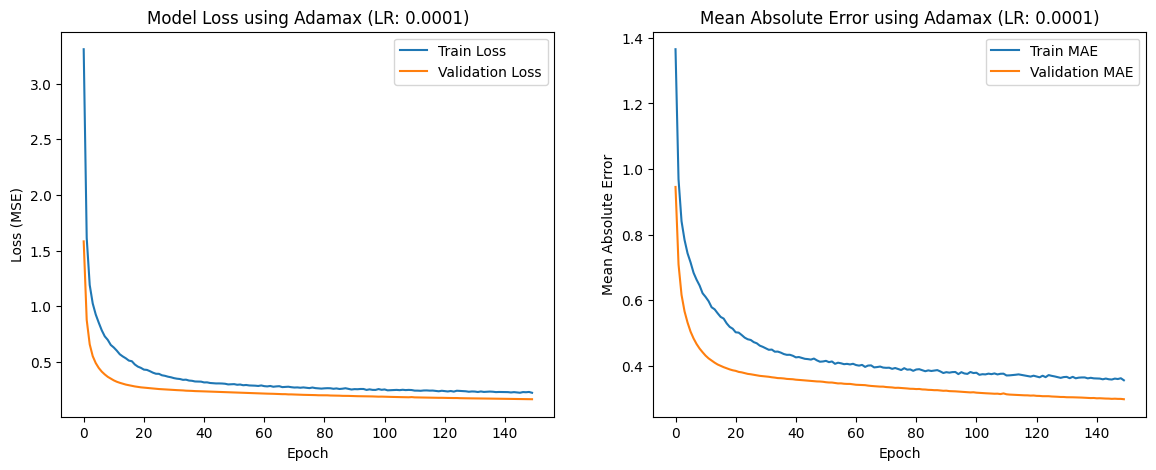

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.8068 - mean_absolute_error: 1.4725 - val_loss: 2.9830 - val_mean_absolute_error: 1.2872 - learning_rate: 1.0000e-05
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4433 - mean_absolute_error: 1.4042 - val_loss: 2.7188 - val_mean_absolute_error: 1.2294 - learning_rate: 1.0000e-05
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1669 - mean_absolute_error: 1.3447 - val_loss: 2.4389 - val_mean_absolute_error: 1.1673 - learning_rate: 1.0000e-05
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9593 - mean_absolute_error: 1.2967 - val_loss: 2.2107 - val_mean_absolute_error: 1.1121 - learning_rate: 1.0000e-05
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6160 - mean_absolute_error: 1.2308 - val_loss: 2.0209 - val_mean_absolute_error: 1.0678 - learning_rate: 1.0000e-05
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4372 - mean_absolute_error: 1.1831 - val_l

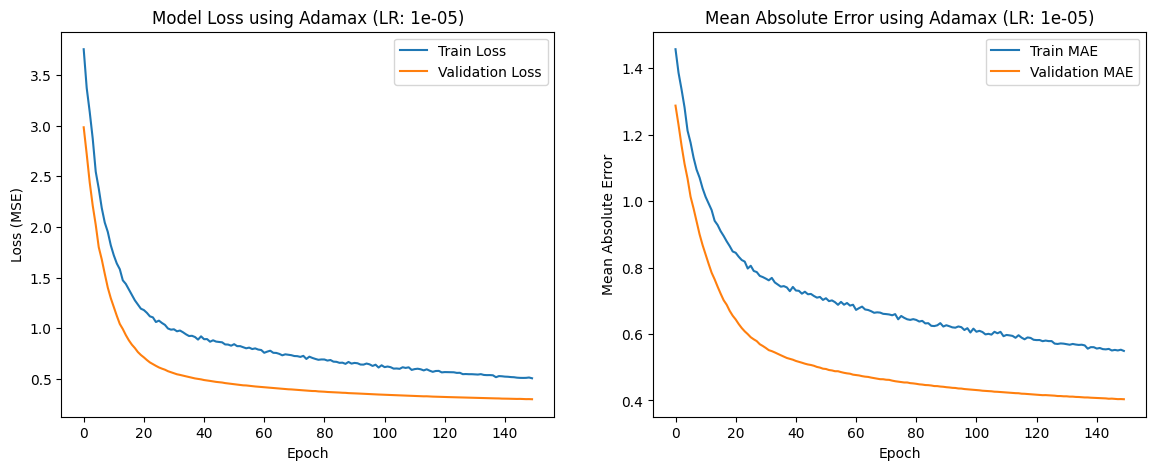

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4308 - mean_absolute_error: 0.4816 - val_loss: 0.2308 - val_mean_absolute_error: 0.3522 - learning_rate: 0.1000
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2631 - mean_absolute_error: 0.3867 - val_loss: 0.1948 - val_mean_absolute_error: 0.3303 - learning_rate: 0.1000
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2493 - mean_absolute_error: 0.3767 - val_loss: 0.1817 - val_mean_absolute_error: 0.3222 - learning_rate: 0.1000
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2250 - mean_absolute_error: 0.3577 - val_loss: 0.1631 - val_mean_absolute_error: 0.2961 - learning_rate: 0.1000
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2203 - mean_absolute_error: 0.3538 - val_loss: 0.1663 - val_mean_absolute_error: 0.2954 - learning_rate: 0.1000
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2110 - mean_absolute_error: 0.3483 - val_loss: 0.1508 - val_me

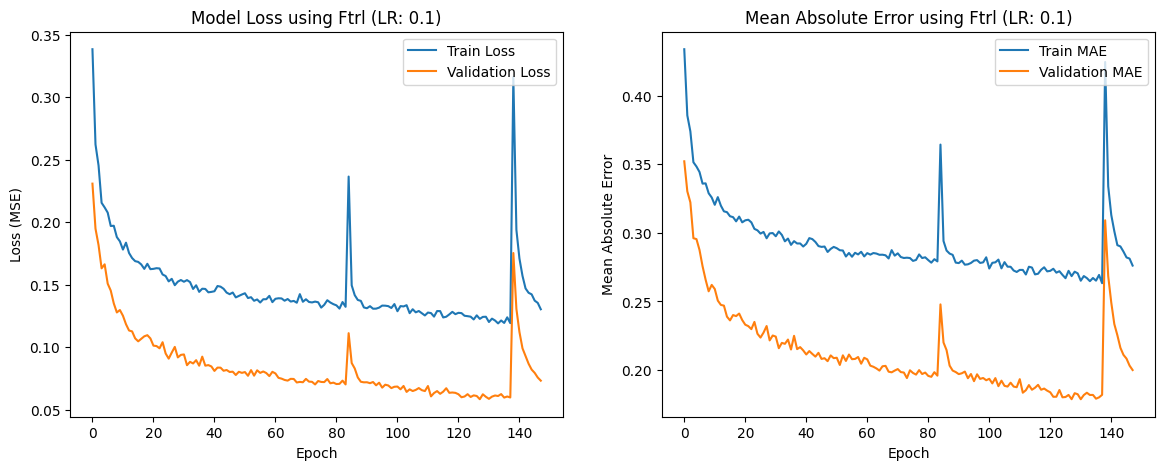

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4055 - mean_absolute_error: 0.4715 - val_loss: 0.2962 - val_mean_absolute_error: 0.4049 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2813 - mean_absolute_error: 0.4006 - val_loss: 0.2033 - val_mean_absolute_error: 0.3341 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2435 - mean_absolute_error: 0.3716 - val_loss: 0.1846 - val_mean_absolute_error: 0.3202 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2395 - mean_absolute_error: 0.3706 - val_loss: 0.1685 - val_mean_absolute_error: 0.3040 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2213 - mean_absolute_error: 0.3578 - val_loss: 0.1620 - val_mean_absolute_error: 0.2988 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2198 - mean_absolute_error: 0.3547 - val_loss: 0.1549 - val_me

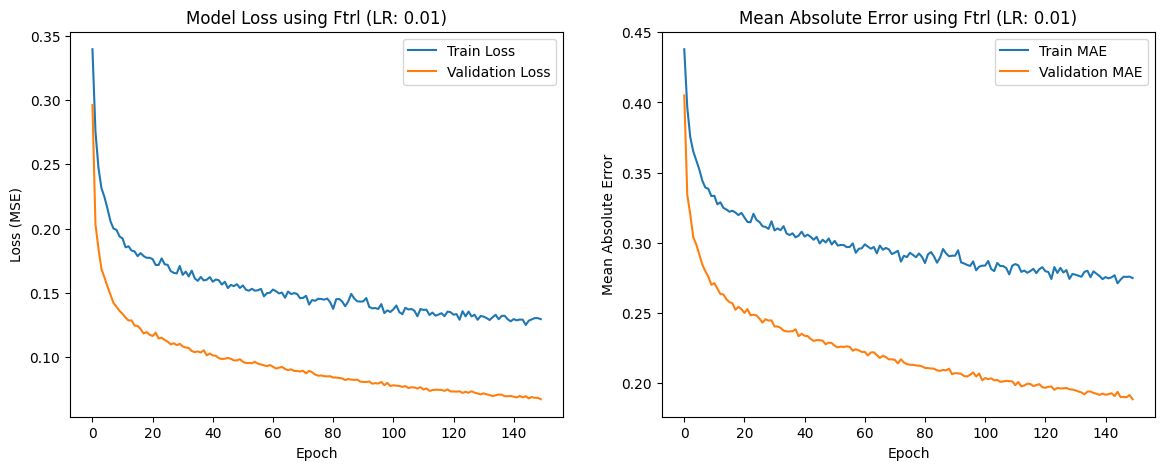

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0210 - mean_absolute_error: 0.7594 - val_loss: 0.4218 - val_mean_absolute_error: 0.4901 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4841 - mean_absolute_error: 0.5322 - val_loss: 0.3553 - val_mean_absolute_error: 0.4455 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4310 - mean_absolute_error: 0.5024 - val_loss: 0.3328 - val_mean_absolute_error: 0.4292 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4163 - mean_absolute_error: 0.4920 - val_loss: 0.3189 - val_mean_absolute_error: 0.4190 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3966 - mean_absolute_error: 0.4813 - val_loss: 0.3100 - val_mean_absolute_error: 0.4126 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3888 - mean_absolute_error: 0.4793 - val_loss: 0.3011 - val_me

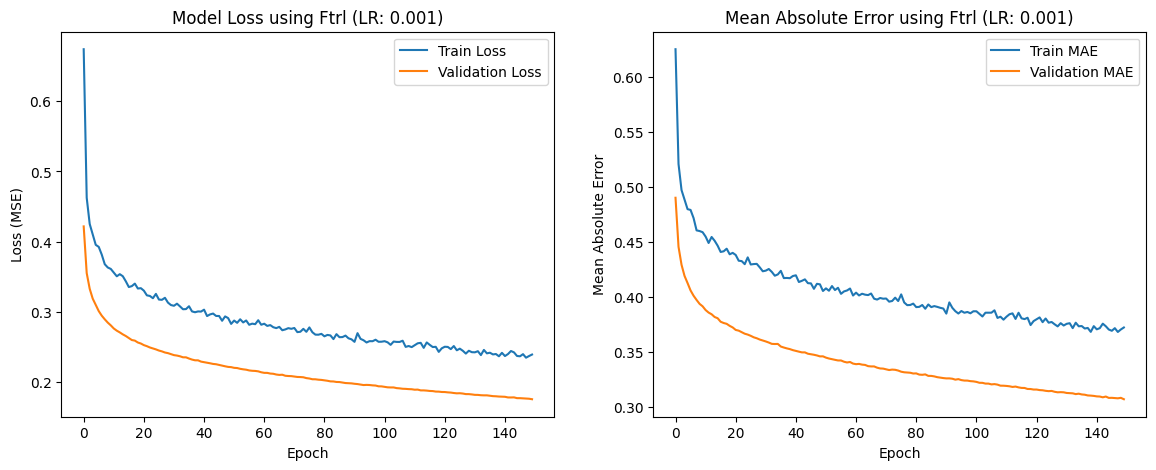

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9425 - mean_absolute_error: 0.7788 - val_loss: 0.8949 - val_mean_absolute_error: 0.7532 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8455 - mean_absolute_error: 0.7283 - val_loss: 0.8075 - val_mean_absolute_error: 0.7046 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7992 - mean_absolute_error: 0.7056 - val_loss: 0.7707 - val_mean_absolute_error: 0.6842 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7606 - mean_absolute_error: 0.6846 - val_loss: 0.7436 - val_mean_absolute_error: 0.6692 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7329 - mean_absolute_error: 0.6697 - val_loss: 0.7202 - val_mean_absolute_error: 0.6564 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7194 - mean_absolute_error: 0.6602 - val_l

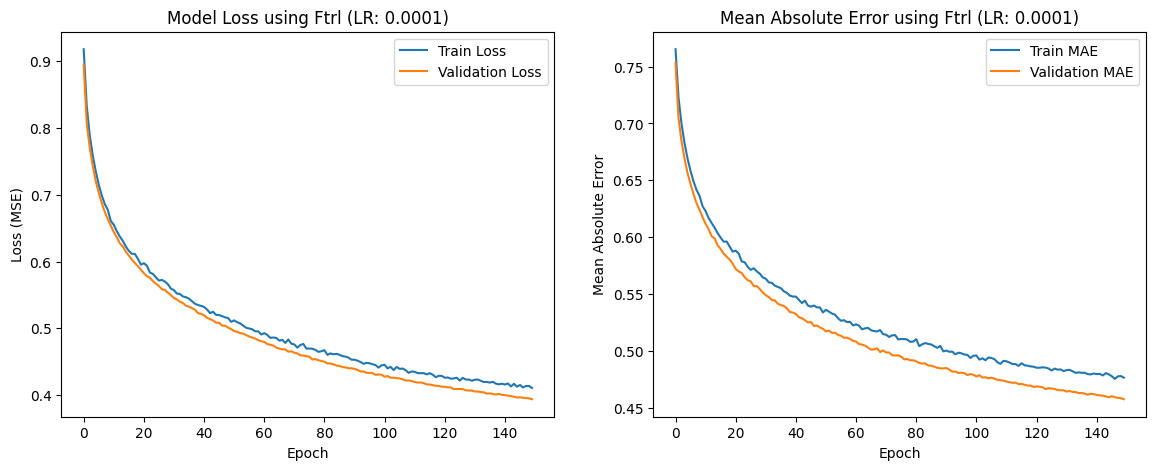

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0858 - mean_absolute_error: 0.8338 - val_loss: 1.0465 - val_mean_absolute_error: 0.8171 - learning_rate: 1.0000e-05
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0482 - mean_absolute_error: 0.8193 - val_loss: 1.0570 - val_mean_absolute_error: 0.8189 - learning_rate: 1.0000e-05
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0443 - mean_absolute_error: 0.8183 - val_loss: 1.0502 - val_mean_absolute_error: 0.8160 - learning_rate: 1.0000e-05
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0298 - mean_absolute_error: 0.8191 - val_loss: 1.0449 - val_mean_absolute_error: 0.8141 - learning_rate: 1.0000e-05
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0581 - mean_absolute_error: 0.8261 - val_loss: 1.0404 - val_mean_absolute_error: 0.8120 - learning_rate: 1.0000e-05
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0503 - mean_absolute_error: 0.8207 - val_l

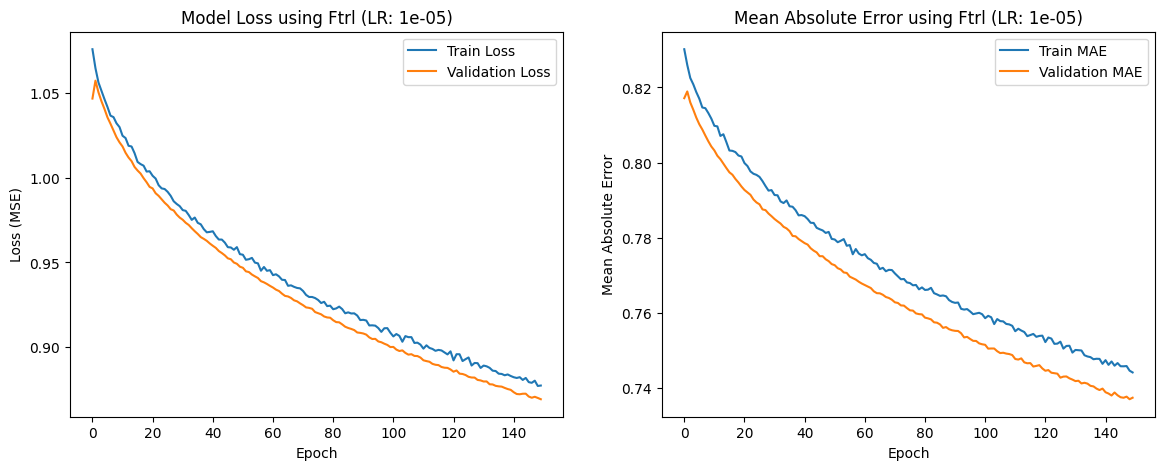

In [9]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam, Nadam, Adamax, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

# Label encode 'Season'
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-Hot Encode 'District' and 'Condition'
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Define features and target
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_hours',
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration_sum', 
            'Season', 'Sown']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scale the features and the target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Define optimizers
optimizers = [
    SGD,
    RMSprop,
    Adagrad,
    Adam,
    Nadam,
    Adamax,
    Ftrl
]

# Define learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Function to build a model
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    return model

# Function to compile, train, and plot results for each optimizer and learning rate
def train_and_plot(optimizer, learning_rate):
    optimizer_instance = optimizer(learning_rate=learning_rate)  # Create optimizer instance
    model = build_model()
    model.compile(optimizer=optimizer_instance, loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1,
                        callbacks=[early_stopping, reduce_lr])
    
    plt.figure(figsize=(14, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss using {optimizer.__name__} (LR: {learning_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')

    # Plot Mean Absolute Error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Train MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title(f'Mean Absolute Error using {optimizer.__name__} (LR: {learning_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    
    plt.show()

# Train and plot results for each optimizer and learning rate
for optimizer in optimizers:
    for lr in learning_rates:
        train_and_plot(optimizer, lr)


### Experimenting with multiple hidden layers and perceptrons

Epoch 1/150


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4924 - mean_absolute_error: 0.5183 - val_loss: 0.2795 - val_mean_absolute_error: 0.3941 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2644 - mean_absolute_error: 0.3813 - val_loss: 0.2447 - val_mean_absolute_error: 0.3688 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2368 - mean_absolute_error: 0.3570 - val_loss: 0.2285 - val_mean_absolute_error: 0.3586 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2131 - mean_absolute_error: 0.3420 - val_loss: 0.2139 - val_mean_absolute_error: 0.3468 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1976 - mean_absolute_error: 0.3299 - val_loss: 0.2002 - val_mean_absolute_error: 0.3334 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1874 - mean_absolute_error: 0.3205 - val_loss: 0.1905 - val_mean_absolute_

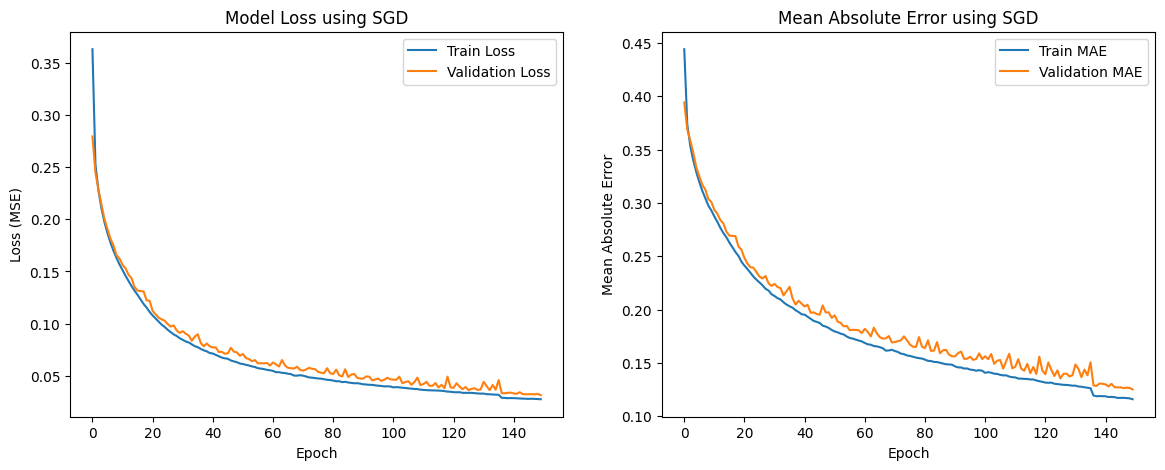

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4532 - mean_absolute_error: 0.4914 - val_loss: 0.2423 - val_mean_absolute_error: 0.3667 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2066 - mean_absolute_error: 0.3406 - val_loss: 0.1961 - val_mean_absolute_error: 0.3363 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1795 - mean_absolute_error: 0.3146 - val_loss: 0.1666 - val_mean_absolute_error: 0.3019 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1524 - mean_absolute_error: 0.2907 - val_loss: 0.1507 - val_mean_absolute_error: 0.2866 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1401 - mean_absolute_error: 0.2777 - val_loss: 0.1370 - val_mean_absolute_error: 0.2719 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1256 - mean_absolute_error: 0.2620 - val_loss: 0.1202 - val_me

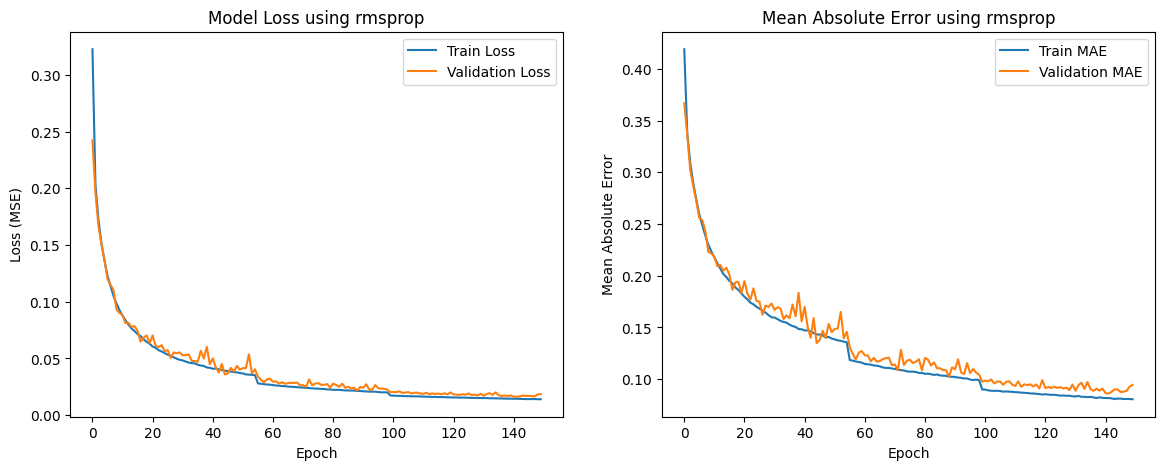

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4354 - mean_absolute_error: 0.4868 - val_loss: 0.2687 - val_mean_absolute_error: 0.3906 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2459 - mean_absolute_error: 0.3708 - val_loss: 0.2347 - val_mean_absolute_error: 0.3650 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2243 - mean_absolute_error: 0.3554 - val_loss: 0.2189 - val_mean_absolute_error: 0.3527 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2030 - mean_absolute_error: 0.3380 - val_loss: 0.2080 - val_mean_absolute_error: 0.3446 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1946 - mean_absolute_error: 0.3288 - val_loss: 0.1987 - val_mean_absolute_error: 0.3353 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1798 - mean_absolute_error: 0.3160 - val_loss: 0.1918 - val_me

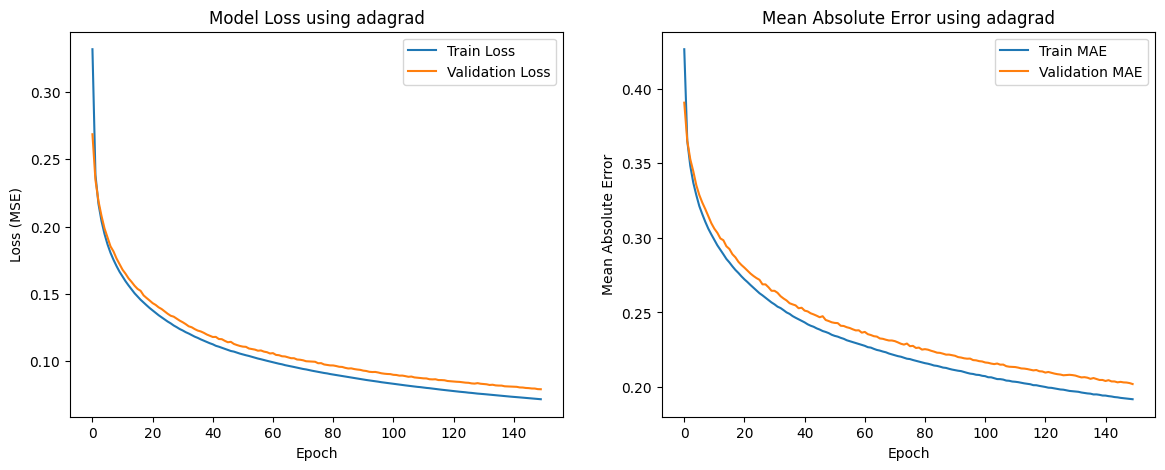

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5065 - mean_absolute_error: 0.5214 - val_loss: 0.2251 - val_mean_absolute_error: 0.3571 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2136 - mean_absolute_error: 0.3480 - val_loss: 0.1882 - val_mean_absolute_error: 0.3265 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1800 - mean_absolute_error: 0.3166 - val_loss: 0.1660 - val_mean_absolute_error: 0.3045 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1523 - mean_absolute_error: 0.2915 - val_loss: 0.1477 - val_mean_absolute_error: 0.2889 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1402 - mean_absolute_error: 0.2796 - val_loss: 0.1350 - val_mean_absolute_error: 0.2746 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1268 - mean_absolute_error: 0.2628 - val_loss: 0.1233 - val_me

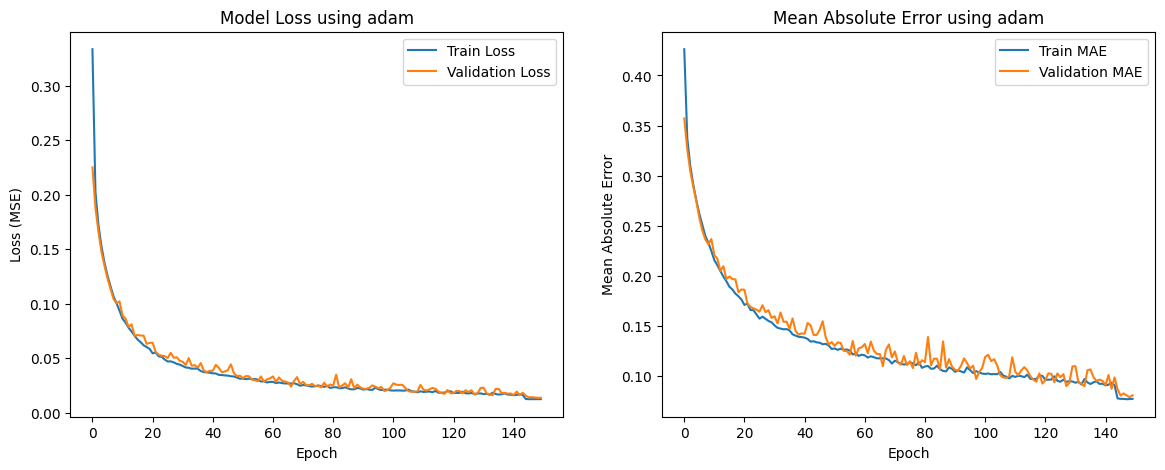

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4758 - mean_absolute_error: 0.5182 - val_loss: 0.2414 - val_mean_absolute_error: 0.3718 - learning_rate: 0.0010
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2240 - mean_absolute_error: 0.3565 - val_loss: 0.1972 - val_mean_absolute_error: 0.3343 - learning_rate: 0.0010
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1870 - mean_absolute_error: 0.3227 - val_loss: 0.1687 - val_mean_absolute_error: 0.3054 - learning_rate: 0.0010
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1606 - mean_absolute_error: 0.2983 - val_loss: 0.1510 - val_mean_absolute_error: 0.2880 - learning_rate: 0.0010
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1366 - mean_absolute_error: 0.2753 - val_loss: 0.1328 - val_mean_absolute_error: 0.2691 - learning_rate: 0.0010
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1277 - mean_absolute_error: 0.2609 - val_loss: 0.1214 - val_me

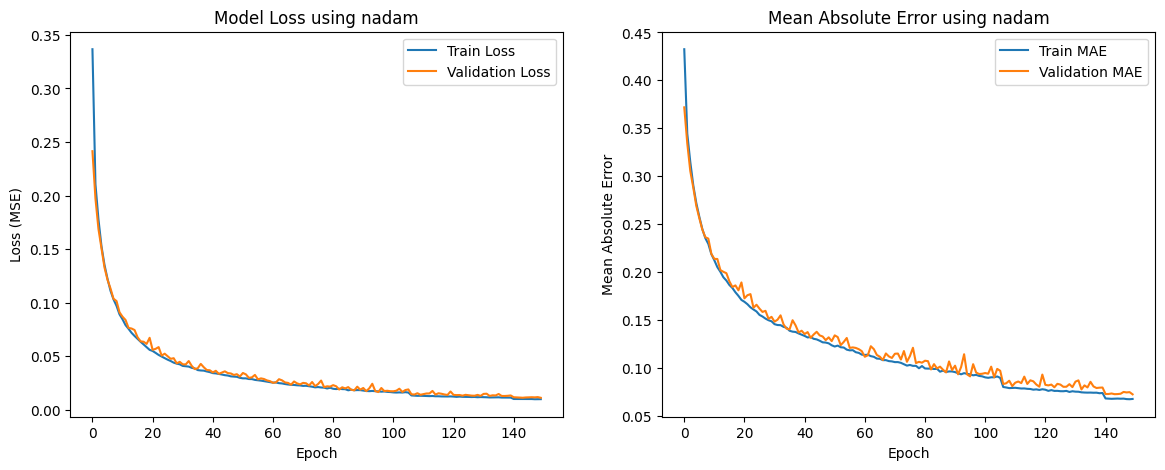

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4907 - mean_absolute_error: 0.5188 - val_loss: 0.2619 - val_mean_absolute_error: 0.3860 - learning_rate: 0.0020
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2373 - mean_absolute_error: 0.3666 - val_loss: 0.2200 - val_mean_absolute_error: 0.3494 - learning_rate: 0.0020
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2093 - mean_absolute_error: 0.3389 - val_loss: 0.1904 - val_mean_absolute_error: 0.3273 - learning_rate: 0.0020
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1757 - mean_absolute_error: 0.3127 - val_loss: 0.1716 - val_mean_absolute_error: 0.3084 - learning_rate: 0.0020
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1609 - mean_absolute_error: 0.2959 - val_loss: 0.1567 - val_mean_absolute_error: 0.2927 - learning_rate: 0.0020
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1500 - mean_absolute_error: 0.2846 - val_loss: 0.1494 - val_me

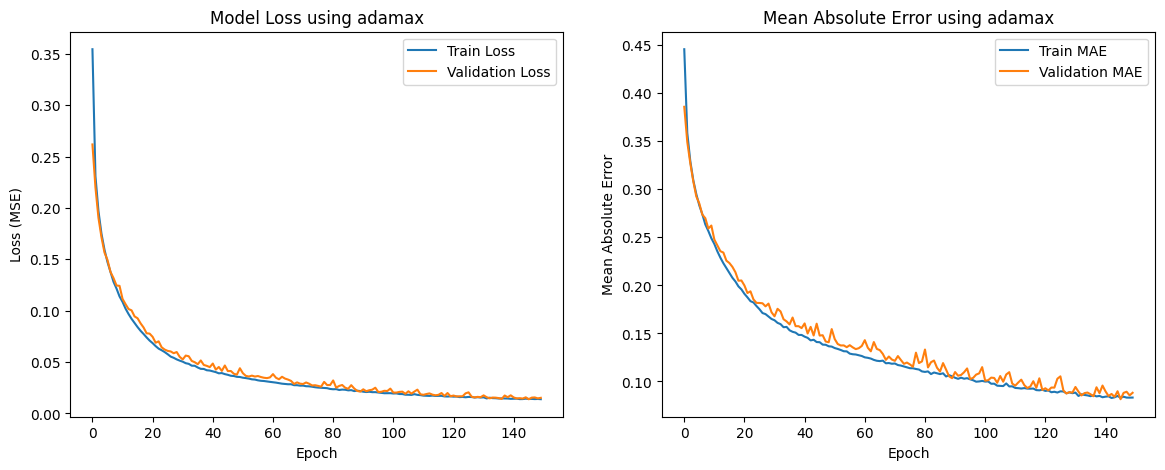

Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5077 - mean_absolute_error: 0.5336 - val_loss: 0.3102 - val_mean_absolute_error: 0.4104 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2795 - mean_absolute_error: 0.3893 - val_loss: 0.2533 - val_mean_absolute_error: 0.3739 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2445 - mean_absolute_error: 0.3618 - val_loss: 0.2273 - val_mean_absolute_error: 0.3545 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2208 - mean_absolute_error: 0.3470 - val_loss: 0.2130 - val_mean_absolute_error: 0.3436 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2049 - mean_absolute_error: 0.3345 - val_loss: 0.2009 - val_mean_absolute_error: 0.3358 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1981 - mean_absolute_error: 0.3294 - val_loss: 0.1942 - val_me

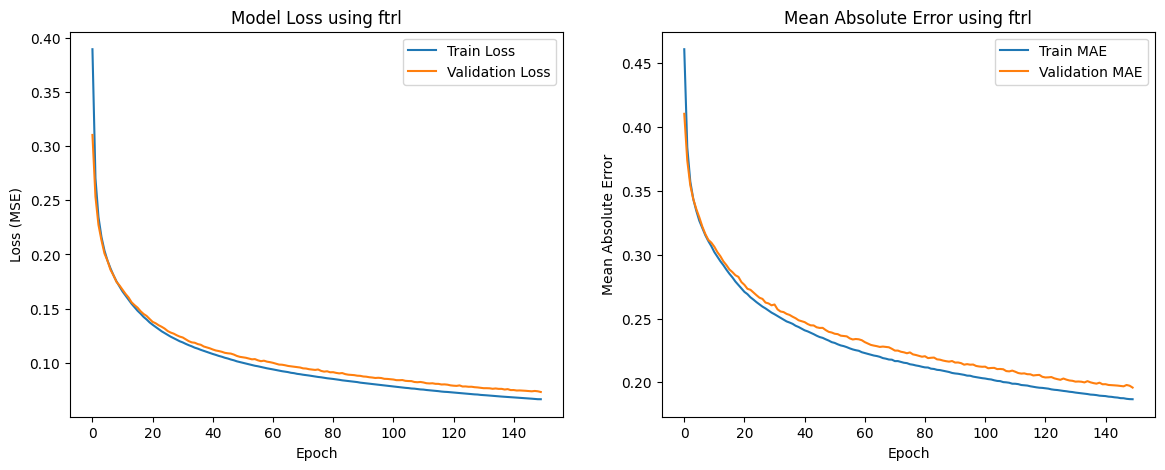

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam, Nadam, Adamax, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

# Label encode 'Season'
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-Hot Encode 'District' and 'Condition'
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Define features and target
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_hours',
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration_sum', 
            'Season', 'Sown']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scale the features and the target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# List of optimizers
optimizers = [SGD(learning_rate=0.01), RMSprop(learning_rate=0.001), Adagrad(learning_rate=0.01),
              Adam(learning_rate=0.001), Nadam(learning_rate=0.001), Adamax(learning_rate=0.002),
              Ftrl(learning_rate=0.01)]

# Function to build a model
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    return model

# Function to compile, train, and plot results for each optimizer
def train_and_plot(optimizer):
    model = build_model()
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1,
                        callbacks=[early_stopping, reduce_lr])
    
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss using {optimizer.get_config()["name"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Train MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title(f'Mean Absolute Error using {optimizer.get_config()["name"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.show()

# Train and plot results for each optimizer
for optimizer in optimizers:
    train_and_plot(optimizer)